# Figures 

## SOSE

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
import gsw
from fastjmd95 import jmd95numba
from fastjmd95 import rho, drhods, drhodt
import json

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [3]:
wmt = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/models/SOSE/wmt_budget_terms.zarr'))
wmt.load()

<xarray.Dataset>
Dimensions:               (time: 438, sigma2_bin: 999)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_slt                (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_th                 (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R2                    (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    R2_slt                (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    R2_th                 (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_slt           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_th            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float32 -2.061e+07 ... 0.0

In [7]:
wmt_budget_terms = wmt.sel(time=slice('2006', '2010'))

In [4]:
#indices
indices1 = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/indices.zarr')).load()
si = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/sose_si_index.zarr')).load()
si_resampled = si.resample(time='MS').mean('time')

In [5]:
ind = xr.merge([indices1, si_resampled])
indices = ind.drop('sose')

## Time mean budgets

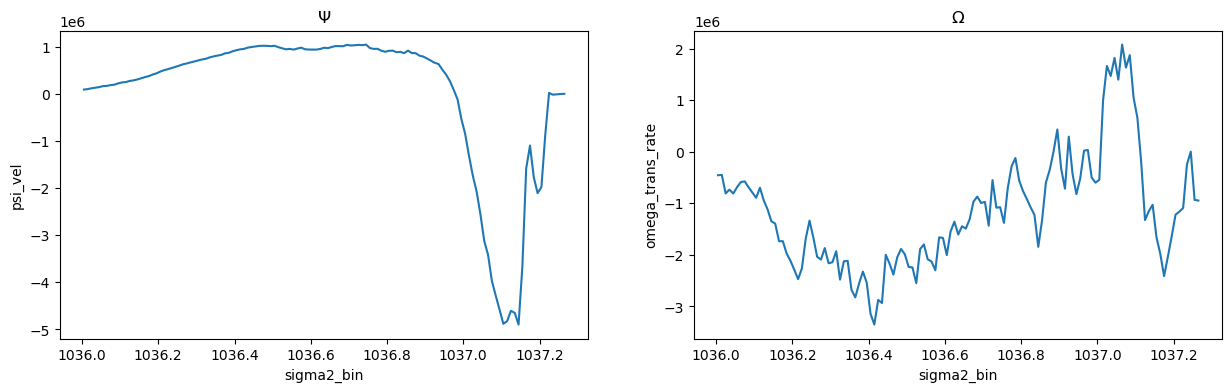

In [21]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4))
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1036.0, 1037.27)).plot(ax=ax0)
wmt_budget_terms.omega_trans_rate.mean('time').sel(sigma2_bin=slice(1036.0, 1037.27)).plot(ax=ax1)
ax0.set_title(r'$\Psi$')
ax1.set_title(r'$\Omega$');

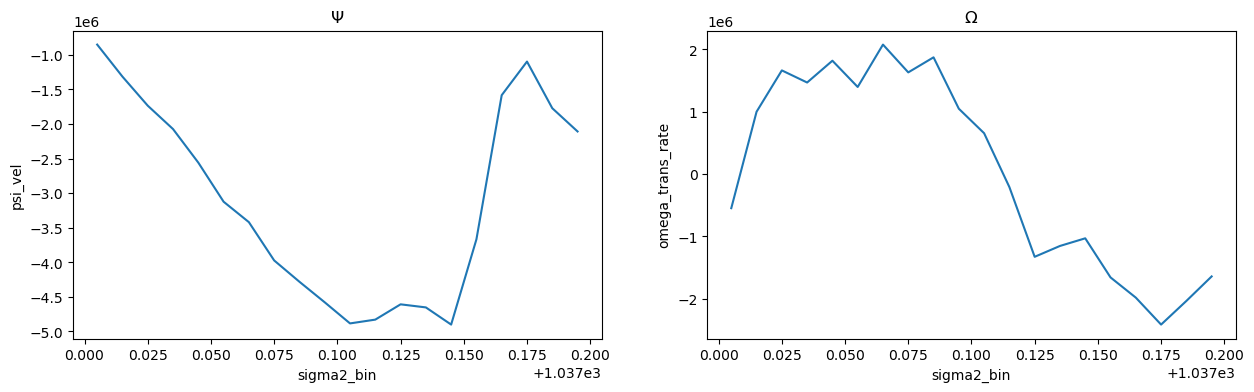

In [22]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4))
wmt_budget_terms.psi_vel.mean('time').sel(sigma2_bin=slice(1037, 1037.2)).plot(ax=ax0)
wmt_budget_terms.omega_trans_rate.mean('time').sel(sigma2_bin=slice(1037, 1037.2)).plot(ax=ax1)
ax0.set_title(r'$\Psi$')
ax1.set_title(r'$\Omega$');

In [29]:
#locate at which sigma bin does transport reach minimum
#1037.145
wmt_budget_terms.psi_vel.sigma2_bin.where(wmt_budget_terms.psi_vel.mean('time')==-4900361)

<xarray.DataArray 'sigma2_bin' (sigma2_bin: 999)>
array([     nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
...
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan, 1037.145,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan])
Coordinates:
  * sigma2_bin  (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03 1.037e+03

### $\frac{\partial V}{\partial t}$

In [8]:
bottom = (wmt_budget_terms.mean('time').isel(sigma2_bin=-1) - 
          wmt_budget_terms.mean('time').sel(sigma2_bin=1037.145, method='nearest'))/1e6
deep = (wmt_budget_terms.mean('time').sel(sigma2_bin=1037.145, method='nearest') - 
        wmt_budget_terms.mean('time').isel(sigma2_bin=0))/1e6

In [9]:
bottom.dVdt

<xarray.DataArray 'dVdt' ()>
array(6.55753158)

In [10]:
bottom.dVdt + deep.dVdt

<xarray.DataArray 'dVdt' ()>
array(-4.07461226e-05)

### E-P-R

In [22]:
bottom.psi_vel + deep.psi_vel

<xarray.DataArray 'psi_vel' ()>
array(-0.00366238)

### $\Omega$

In [33]:
bottom.omega_trans_rate + deep.omega_trans_rate

<xarray.DataArray 'omega_trans_rate' ()>
array(0.)

In [34]:
#transformation at the boundary between bottom/dm wm
wmt_budget_terms.omega_trans_rate.mean('time').sel(sigma2_bin=1037.145, method='nearest')/1e6

<xarray.DataArray 'omega_trans_rate' ()>
array(-1.03097075)
Coordinates:
    sigma2_bin  float64 1.037e+03

In [15]:
terms_on_boundary = wmt_budget_terms.sel(sigma2_bin=1037.145, method='nearest')/1e6
terms_on_boundary

<xarray.Dataset>
Dimensions:               (time: 366)
Coordinates:
    sigma2_bin            float64 1.037e+03
  * time                  (time) datetime64[ns] 2006-01-01 ... 2010-12-31
Data variables: (12/27)
    R1                    (time) float64 -1.727 -6.457 -2.59 ... -0.2434 2.341
    R1_slt                (time) float64 -21.23 -35.14 -38.09 ... -21.37 -4.397
    R1_th                 (time) float64 -2.166 2.585 10.81 ... 9.956 4.153
    R2                    (time) float64 0.06161 -2.488 -2.538 ... -7.063 -5.898
    R2_slt                (time) float64 12.26 17.39 24.67 ... 12.22 -1.903
    R2_th                 (time) float64 -6.384 -13.72 -17.56 ... -18.35 -8.456
    ...                    ...
    omega_trans_rate_slt  (time) float64 -6.886 -2.186 -1.626 ... -1.091 -0.7455
    omega_trans_rate_th   (time) float64 -7.302 -8.799 -8.295 ... -1.839 -2.743
    psi_adv               (time) float64 -5.75 -8.656 -12.18 ... -7.997 -1.436
    psi_adv_slt           (time) float64 6.445 11.23 15.03 ... 4.619 11.29 2.559
    psi_adv_th            (time) float64 -12.2 -19.88 -27.21 ... -19.29 -3.995
    psi_vel               (time) float32 -5.811 -6.167 -9.643 ... -0.9342 4.461

In [16]:
terms_on_boundary_polynyaYr = wmt.sel(sigma2_bin=1037.145, method='nearest')/1e6
terms_on_boundary_polynyaYr

<xarray.Dataset>
Dimensions:               (time: 438)
Coordinates:
    sigma2_bin            float64 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables: (12/27)
    R1                    (time) float64 nan -6.416 -5.944 ... -0.2434 2.341
    R1_slt                (time) float64 nan -46.06 -36.26 ... -21.37 -4.397
    R1_th                 (time) float64 nan 12.9 6.065 ... 2.981 9.956 4.153
    R2                    (time) float64 2.799 -2.237 -1.355 ... -7.063 -5.898
    R2_slt                (time) float64 8.217 26.07 16.47 ... 12.22 -1.903
    R2_th                 (time) float64 21.4 -27.2 -17.48 ... -18.35 -8.456
    ...                    ...
    omega_trans_rate_slt  (time) float64 -36.68 -5.646 -4.11 ... -1.091 -0.7455
    omega_trans_rate_th   (time) float64 13.06 -11.33 -12.5 ... -1.839 -2.743
    psi_adv               (time) float64 -24.02 -3.35 -1.701 ... -7.997 -1.436
    psi_adv_slt           (time) float64 -18.6 24.96 16.12 ... 4.619 11.29 2.559
    psi_adv_th            (time) float64 -5.418 -28.31 -17.82 ... -19.29 -3.995
    psi_vel               (time) float32 -26.82 -1.113 -0.346 ... -0.9342 4.461

In [17]:
#boundary omegas
omegas = list()
bdy_omegas = list()

for var in terms_on_boundary.data_vars:
    if var == 'omega_total':
        continue 
    elif var == 'omega_total_slt':
        continue
    elif var == 'omega_total_th':
        continue
    elif var.startswith('omega'):
        omegas.append(var)
        bdy_omegas.append(terms_on_boundary.drop('sigma2_bin').data_vars[var])

In [18]:
#boundary omegas
omegas_polynyaYr = list()
bdy_omegas_polynyaYr = list()

for var in terms_on_boundary_polynyaYr.data_vars:
    if var == 'omega_total':
        continue 
    elif var == 'omega_total_slt':
        continue
    elif var == 'omega_total_th':
        continue
    elif var.startswith('omega'):
        omegas_polynyaYr.append(var)
        bdy_omegas_polynyaYr.append(terms_on_boundary_polynyaYr.drop('sigma2_bin').data_vars[var])

In [19]:
omegas

['omega_mix',
 'omega_mix_slt',
 'omega_mix_th',
 'omega_surf',
 'omega_surf_slt',
 'omega_surf_th',
 'omega_total_2nd',
 'omega_trans_rate',
 'omega_trans_rate_slt',
 'omega_trans_rate_th']

In [20]:
omegas_polynyaYr

['omega_mix',
 'omega_mix_slt',
 'omega_mix_th',
 'omega_surf',
 'omega_surf_slt',
 'omega_surf_th',
 'omega_total_2nd',
 'omega_trans_rate',
 'omega_trans_rate_slt',
 'omega_trans_rate_th']

In [21]:
len(omegas)

10

In [22]:
len(bdy_omegas)

10

In [23]:
for i in range(10):
    print(bdy_omegas[i].name)

omega_mix
omega_mix_slt
omega_mix_th
omega_surf
omega_surf_slt
omega_surf_th
omega_total_2nd
omega_trans_rate
omega_trans_rate_slt
omega_trans_rate_th


In [24]:
bdy_omegas[-3].mean('time')

<xarray.DataArray 'omega_trans_rate' ()>
array(-1.03097075)

In [25]:
bdy_omegas_polynyaYr[-3].mean('time')

<xarray.DataArray 'omega_trans_rate' ()>
array(1.94877311)

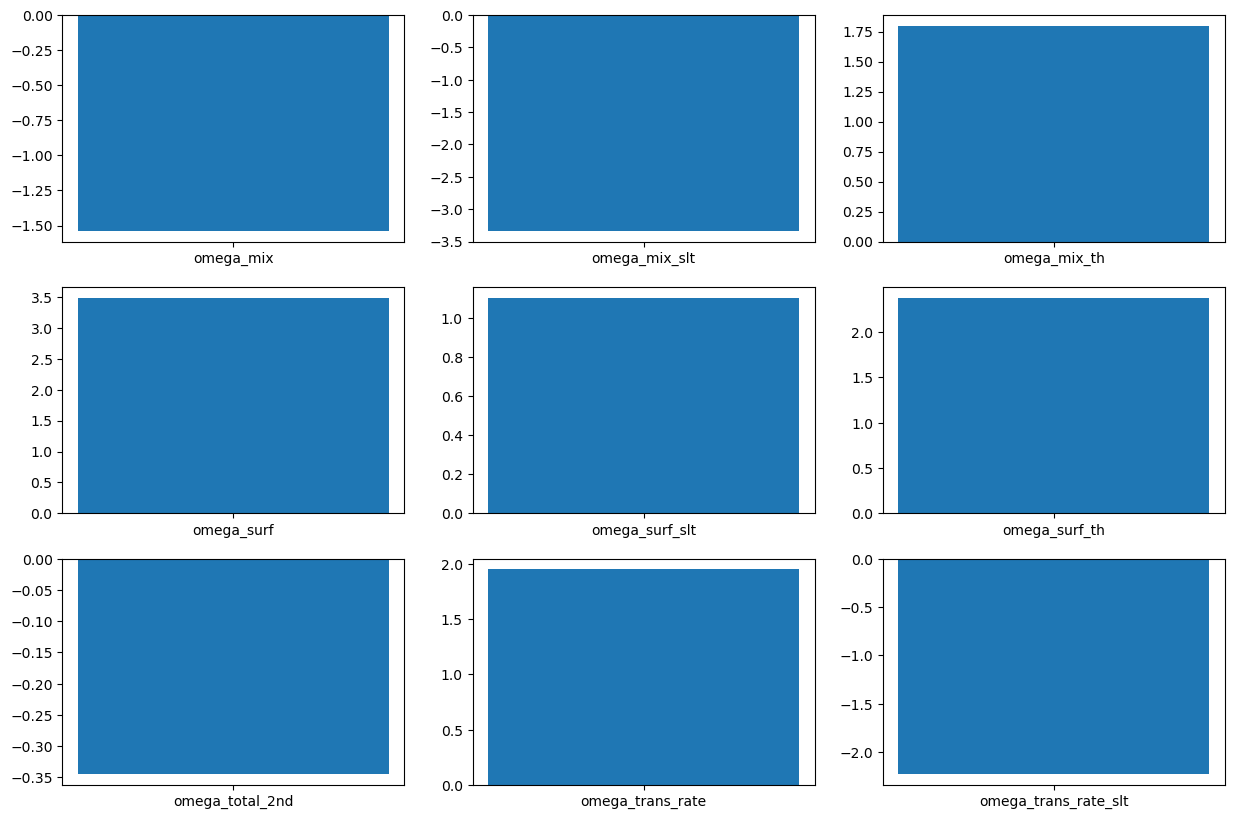

In [51]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
ax = ax.ravel()

for i in range(9):
    ax[i].bar(x=bdy_omegas[i].name, height=bdy_omegas[i].mean('time').values)

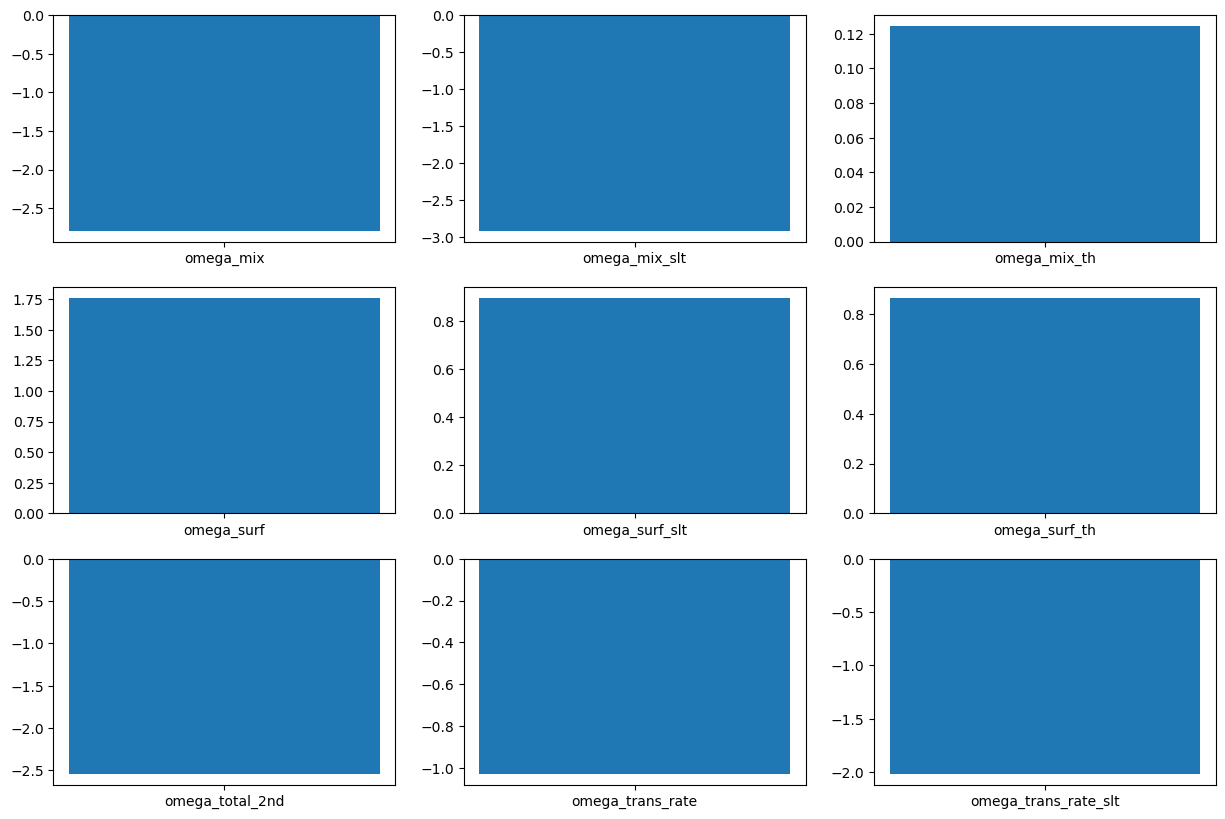

In [52]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
ax = ax.ravel()

for i in range(9):
    ax[i].bar(x=bdy_omegas_polynyaYr[i].name, height=bdy_omegas_polynyaYr[i].mean('time').values)

In [53]:
- bottom.omega_trans_rate + bottom.omega_mix + bottom.omega_surf

<xarray.DataArray ()>
array(-4.4408921e-16)

In [56]:
(- bdy_omegas[-3] + bdy_omegas[0] + bdy_omegas[3]).mean('time')

<xarray.DataArray ()>
array(-2.5913125e-16)

### Budget

* $\frac{\partial V}{\partial t} = \Omega_{total} + R1$ $\Omega_{total} \equiv$ hist(weights=tottend); tottend = $\sigma$.diff(time)*vol / $\Delta$ t
* $\Omega_{trans-rate}$
* $\Psi_{adv} = \Psi_{vel} + R2$
* $R3 = \Omega_{total} - \Psi_{adv} - \Omega_{trans-rate}$
* $\frac{\partial V}{\partial t} = \Psi_{vel} + R2 + \Omega_{trans-rate} + R3 + R1$

__SWITCH SIGN OF ALL TERMS SINCE CUM VOL WAS DEFINED $\int_{\sigma_{max}}^{\sigma_{min}}$ (instead of $\int_{\sigma_{min}}^{\sigma_{max}}$) in wmt budget `poster-figs-sigma-ecco-ts-components-SOSEperiod.ipynb`__

* $\frac{\partial V}{\partial t}$ is (+ to -) for bottom wm, (- to +) for deep wm
   * (No longer cumulative volume!) Decreasing rate of volume means less water in wm; conversely, increasing rate of volume means more water in wm.
* $\Psi$ is (+ to -) for bottom wm, (- to +) for deep wm
   * Negative $\Psi$ means OUTflow, positive $\Psi$ means INflow
* $\Omega$ is (- to +) for bottom wm, (+ to -) for deep wm
   * using only one $\Omega$ (on the boundary) yields a positive value, which means positive transformation of deep layer water being added to bottom layer. (+) into layer 2 (bottom) is trying to add volume, (-) from layer 1 (deep) is trying to remove volume.

In [26]:
print('bottom:', bottom.dVdt.values, ' deep:', deep.dVdt.values)

bottom: 6.557531576396681  deep: -6.557572322519327


In [27]:
print('bottom:', bottom.psi_vel.values, ' deep:', deep.psi_vel.values)

bottom: 4.900361  deep: -4.905242


In [28]:
print('bottom:', bottom.omega_trans_rate.values, ' deep:', deep.omega_trans_rate.values)

bottom: 1.030970752772793  deep: -1.030970752772793


In [29]:
bottom = -bottom
deep = -deep

In [30]:
print('correct bottom:', bottom.dVdt.values, ' correct deep:', deep.dVdt.values)

correct bottom: -6.557531576396681  correct deep: 6.557572322519327


In [31]:
print('correct bottom:', bottom.psi_vel.values, ' correct deep:', deep.psi_vel.values)

correct bottom: -4.900361  correct deep: 4.905242


In [32]:
print('correct bottom:', bottom.omega_trans_rate.values, ' correct deep:', deep.omega_trans_rate.values)

correct bottom: -1.030970752772793  correct deep: 1.030970752772793


### __Bottom budget__

In [33]:
- bottom.dVdt + bottom.psi_vel + bottom.omega_trans_rate + bottom.R1 + bottom.R2 + bottom.R3

<xarray.DataArray ()>
array(2.255806e-07)

In [34]:
- bottom.dVdt + bottom.psi_vel + bottom.omega_trans_rate #w/o residuals

<xarray.DataArray ()>
array(0.62619982)

In [36]:
- bottom.dVdt + bottom.psi_vel + bottom.R2 + bdy_omegas[-3].mean('time') + bottom.R1 + bottom.R3

<xarray.DataArray ()>
array(2.25580601e-07)

In [38]:
- bottom.dVdt + bottom.psi_vel + bdy_omegas[3].mean('time') #w/o residuals

<xarray.DataArray ()>
array(3.41924117)

### __Deep budget__

In [39]:
- deep.dVdt + deep.psi_vel + deep.R2 + deep.omega_trans_rate + deep.R1 + deep.R3

<xarray.DataArray ()>
array(-4.6590835e-08)

In [40]:
- deep.dVdt + deep.psi_vel + deep.R2 + bdy_omegas[-3].mean('time') + deep.R1 + deep.R3

<xarray.DataArray ()>
array(-2.06194155)

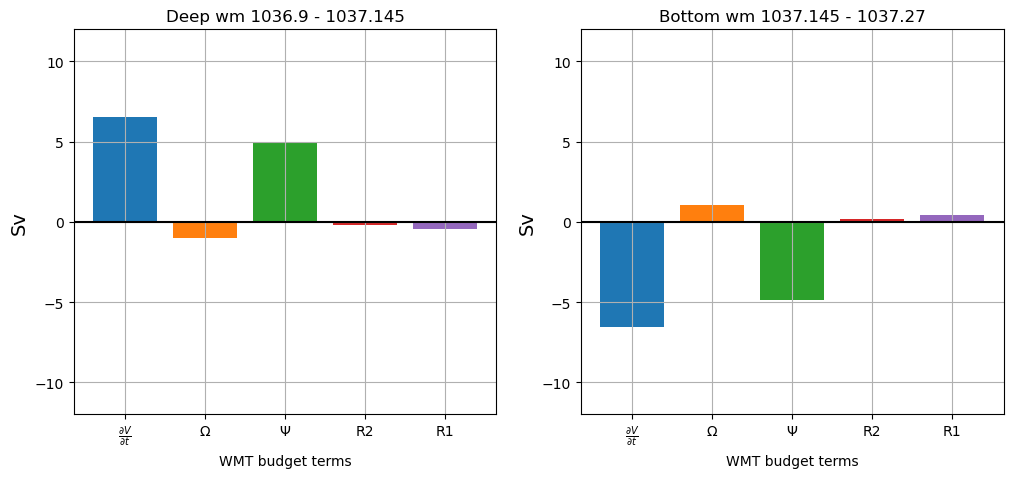

In [45]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.bar(x=r'$\frac{\partial V}{\partial t}$', height = deep.dVdt)
ax0.bar(x=r'$\Omega$', height = -deep.omega_trans_rate)
ax0.bar(x=r'$\Psi$', height=deep.psi_vel)
ax0.bar(x='R2', height=-deep.R2)
ax0.bar(x='R1', height=-deep.R1)
ax0.axhline(y=0, color='k')
ax0.set_title('Deep wm 1036.9 - 1037.145')
ax0.set_ylabel('Sv', fontsize=14)
ax0.set_xlabel('WMT budget terms')
ax0.grid()
ax0.set_ylim(-12,12)

ax1.bar(x=r'$\frac{\partial V}{\partial t}$', height = bottom.dVdt)
ax1.bar(x=r'$\Omega$', height = -bottom.omega_trans_rate)
ax1.bar(x=r'$\Psi$', height=bottom.psi_vel)
ax1.bar(x='R2', height=-bottom.R2)
ax1.bar(x='R1', height=-bottom.R1)
ax1.axhline(y=0, color='k')
ax1.set_title('Bottom wm 1037.145 - 1037.27')
ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('WMT budget terms')
ax1.grid()
ax1.set_ylim(-12,12);

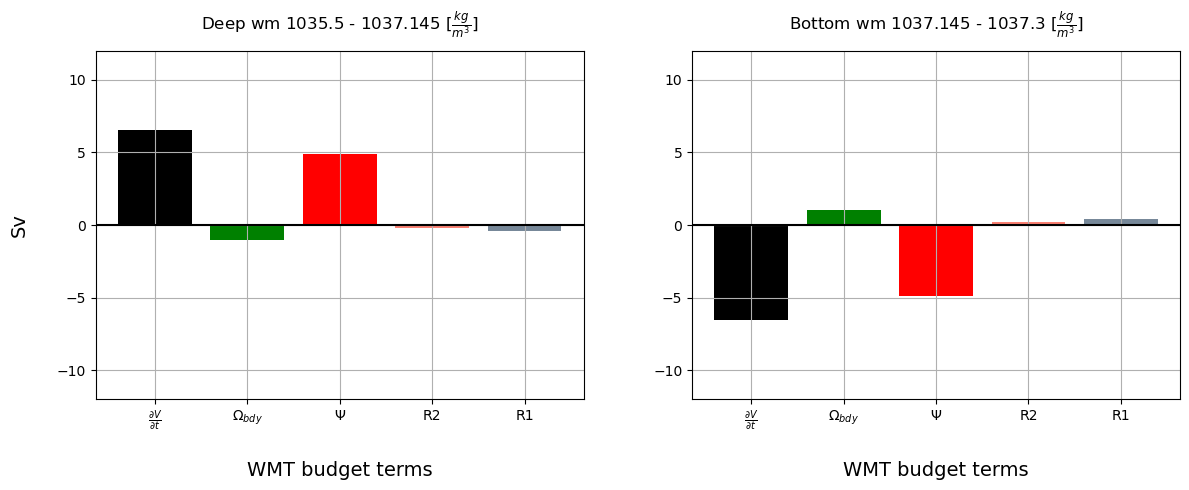

In [49]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.bar(x=r'$\frac{\partial V}{\partial t}$', height = deep.dVdt, color='k')
ax0.bar(x=r'$\Omega_{bdy}$', height = bdy_omegas[-3].mean('time'), color='green')
ax0.bar(x=r'$\Psi$', height= deep.psi_vel, color='red')
ax0.bar(x='R2', height=-deep.R2, color='salmon')
ax0.bar(x='R1', height=-deep.R1, color='lightslategray')
ax0.axhline(y=0, color='k')
ax0.set_title(r'Deep wm 1035.5 - 1037.145 [$\frac{kg}{m^3}$]', pad=15)
ax0.set_ylabel('Sv', fontsize=14, labelpad=20)
ax0.set_xlabel('WMT budget terms', fontsize=14, labelpad=20)
ax0.grid()
ax0.set_ylim(-12,12)

ax1.bar(x=r'$\frac{\partial V}{\partial t}$', height = bottom.dVdt, color='k')
ax1.bar(x=r'$\Omega_{bdy}$', height = -bdy_omegas[-3].mean('time'), color='green')
ax1.bar(x=r'$\Psi$', height=bottom.psi_vel, color='red')
ax1.bar(x='R2', height=-bottom.R2, color='salmon')
ax1.bar(x='R1', height=-bottom.R1, color='lightslategray')
ax1.axhline(y=0, color='k')
ax1.set_title(r'Bottom wm 1037.145 - 1037.3 [$\frac{kg}{m^3}$]', pad=15)
#ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('WMT budget terms', fontsize=14, labelpad=20)
ax1.grid()
ax1.set_ylim(-12,12)
plt.tight_layout(w_pad=5);

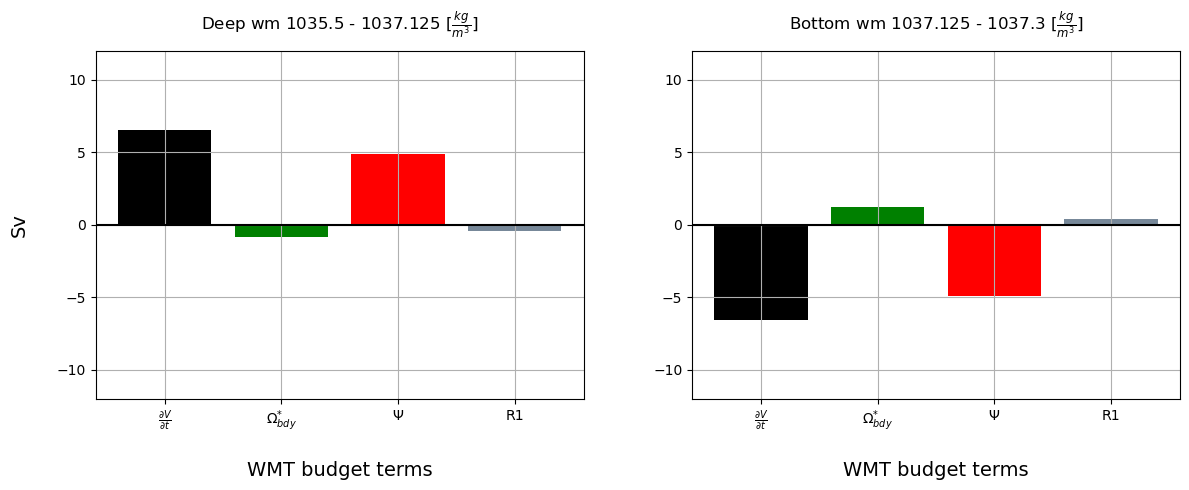

In [51]:
#R2 included in omega term (denoted as omega*)
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,5))

ax0.bar(x=r'$\frac{\partial V}{\partial t}$', height = deep.dVdt, color='k')
ax0.bar(x=r'$\Omega^{*}_{bdy}$', height = (bdy_omegas[-3].mean('time') + deep.R2), color='green')
ax0.bar(x=r'$\Psi$', height= deep.psi_vel, color='red')
ax0.bar(x='R1', height=-deep.R1, color='lightslategray')
ax0.axhline(y=0, color='k')
ax0.set_title(r'Deep wm 1035.5 - 1037.125 [$\frac{kg}{m^3}$]', pad=15)
ax0.set_ylabel('Sv', fontsize=14, labelpad=20)
ax0.set_xlabel('WMT budget terms', fontsize=14, labelpad=20)
ax0.grid()
ax0.set_ylim(-12,12)

ax1.bar(x=r'$\frac{\partial V}{\partial t}$', height = bottom.dVdt, color='k')
ax1.bar(x=r'$\Omega^{*}_{bdy}$', height = -(bdy_omegas[-3].mean('time')+bottom.R2), color='green')
ax1.bar(x=r'$\Psi$', height=bottom.psi_vel, color='red')
ax1.bar(x='R1', height=-bottom.R1, color='lightslategray')
ax1.axhline(y=0, color='k')
ax1.set_title(r'Bottom wm 1037.125 - 1037.3 [$\frac{kg}{m^3}$]', pad=15)
#ax1.set_ylabel('Sv', fontsize=14)
ax1.set_xlabel('WMT budget terms', fontsize=14, labelpad=20)
ax1.grid()
ax1.set_ylim(-12,12)
plt.tight_layout(w_pad=5);

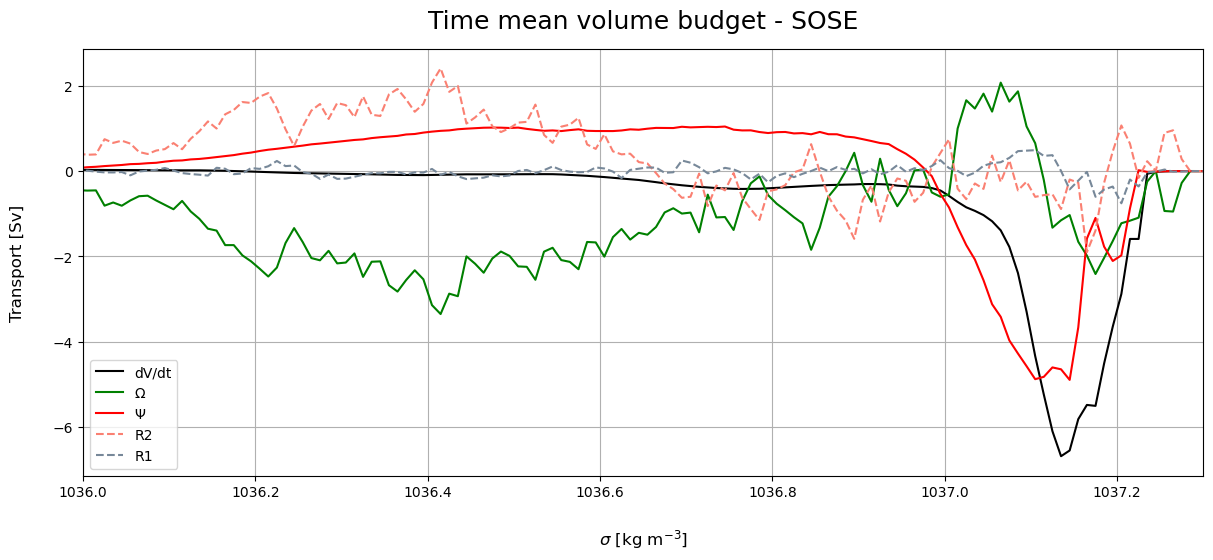

In [54]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
#(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
#(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='red')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon', linestyle='--')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray', linestyle='--')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12, labelpad=20)
plt.ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
plt.title(r'Time mean volume budget - SOSE', fontsize=18, pad=15)
plt.xlim(1036, 1037.3);

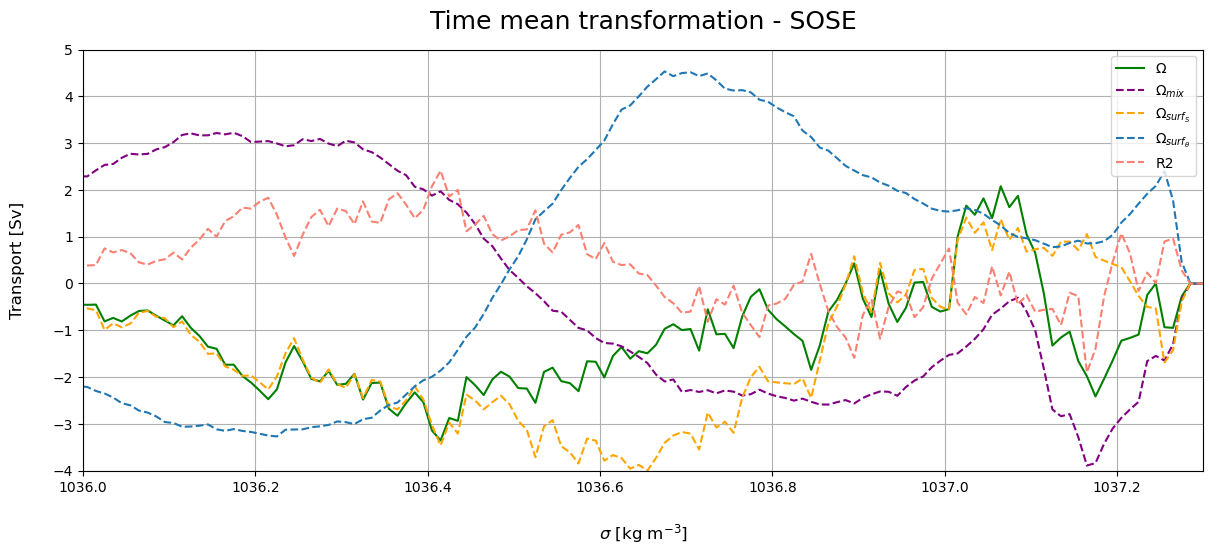

In [55]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green', figsize=(12,5))
#(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
#(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon', linestyle='--')

plt.legend()
plt.grid()
plt.ylim(-4, 5)
plt.xlim(1036, 1037.3)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12, labelpad=20)
plt.ylabel(r'Transport [Sv]', fontsize=12, labelpad=20)
plt.title('Time mean transformation - SOSE', fontsize=18, pad=15);

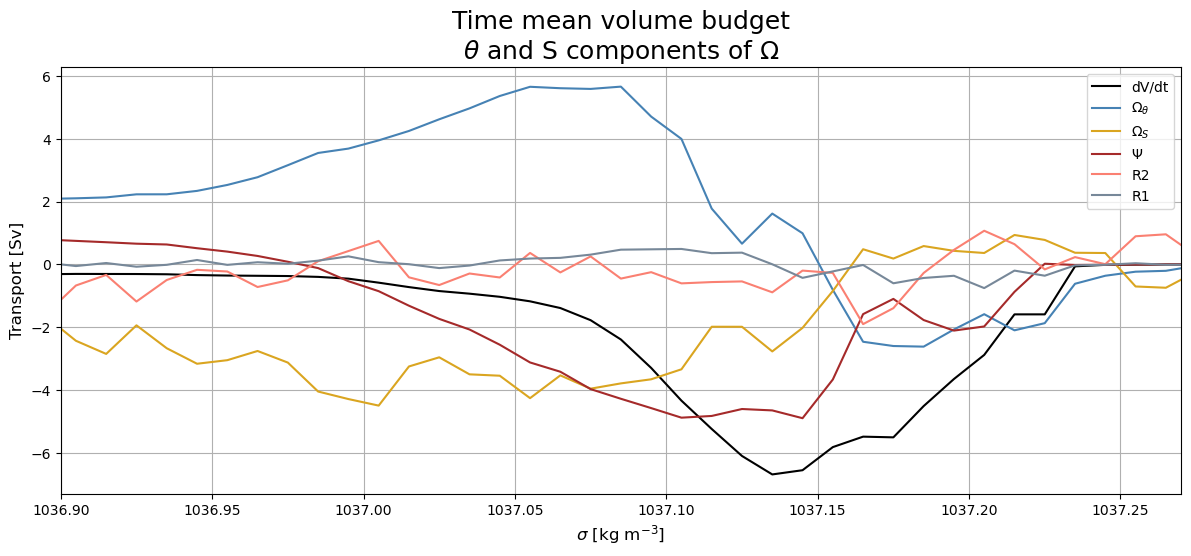

In [89]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
plt.xlim(1036.90, 1037.27)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

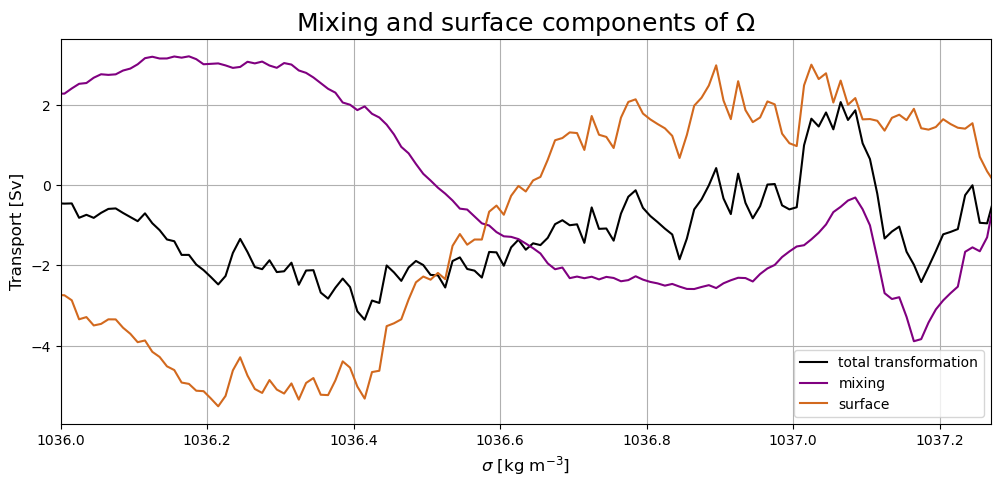

In [91]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
plt.xlim(1036, 1037.27)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

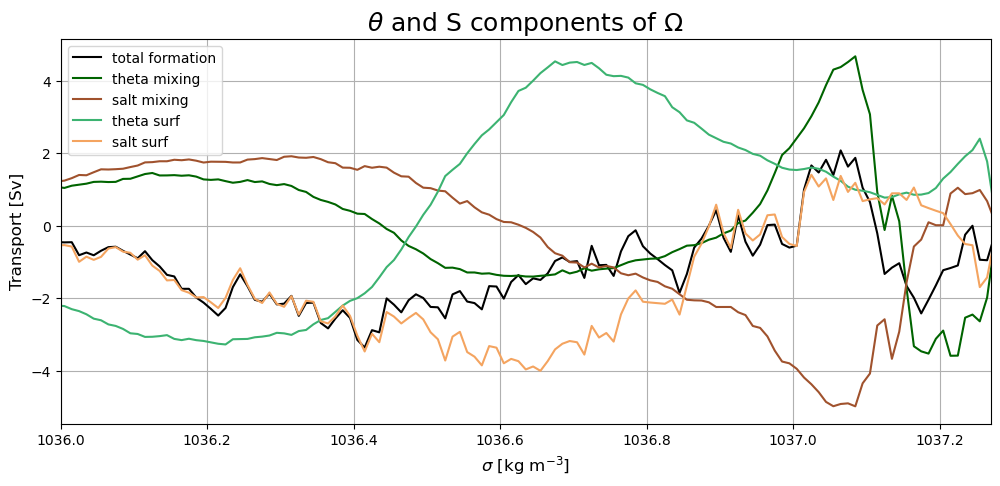

In [93]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total formation', color='k')
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
plt.xlim(1036, 1037.27)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

## Monthly Climatology

In [56]:
def anomaly(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    #anom_chunk = anom.chunk({'time':12})
    anom_rolled = anom.rolling(time=73, center=True).mean(dim='time') #yearly rolling mean to remove seasonal cycle
    return anom_rolled

In [57]:
#1037.955 to include 1036.5 when slicing
anom_ds = (wmt_budget_terms/1e6)#.sel(sigma2_bin=slice(1036.495, 1037.5)))/1e6

In [58]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [59]:
clim_ds = anom_ds

In [60]:
clim_ds

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 366)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2006-01-01 ... 2010-12-31
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_slt                (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_th                 (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R2                    (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_slt                (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_th                 (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_slt           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_th            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float32 1.132 1.132 ... 0.0 0.0

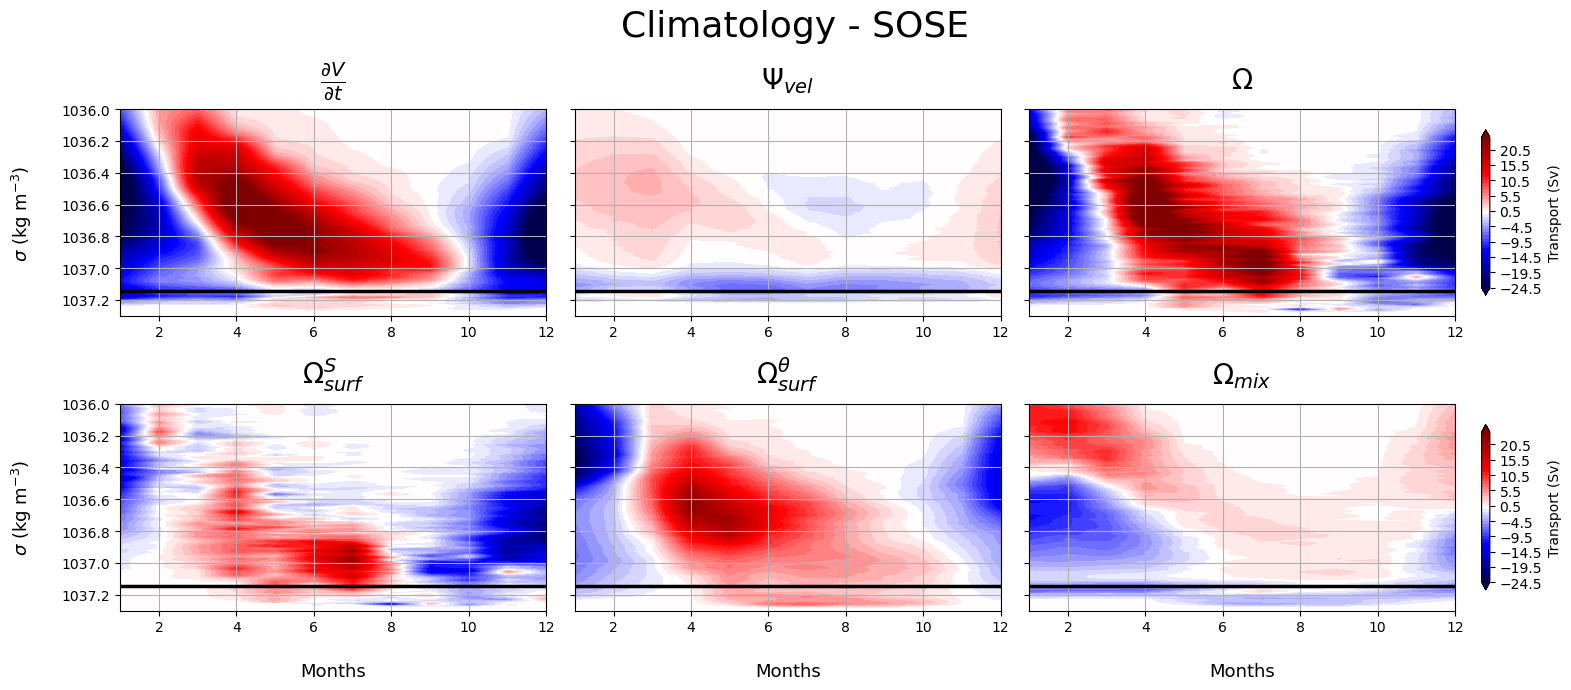

In [63]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-25, 25) + 0.5

dVdt_clim = clim(clim_ds.dVdt)
c = ax[0,0].contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin,
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ (kg m$^{-3}$)', fontsize=13, labelpad=20)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20, pad=15)
ax[0,0].grid()
ax[0,0].set_ylim(1037.3, 1036)
ax[0,0].axhline(y=1037.145, color='k', linewidth=2.5)

psi_vel_clim = clim(clim_ds.psi_vel)
c_psi = ax[0,1].contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20, pad=15)
ax[0,1].grid()
ax[0,1].axhline(y=1037.145, color='k', linewidth=2.5)

omega_clim = clim(clim_ds.omega_trans_rate)
c_omega = ax[0,2].contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Transport (Sv)', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20, pad=15)
ax[0,2].grid()
ax[0,2].axhline(y=1037.145, color='k', linewidth=2.5)

omega_surf_slt_clim = clim(clim_ds.omega_surf_slt)
c_surf_slt = ax[1,0].contourf(omega_surf_slt_clim.month, 
                                omega_surf_slt_clim.sigma2_bin, 
                                omega_surf_slt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ (kg m$^{-3}$)', fontsize=13, labelpad=20)
ax[1,0].set_xlabel('Months', fontsize=13, labelpad=20)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20, pad=15)
ax[1,0].grid()
ax[1,0].axhline(y=1037.145, color='k', linewidth=2.5)

omega_surf_th_clim = clim(clim_ds.omega_surf_th)
c_surf_th = ax[1,1].contourf(omega_surf_th_clim.month, omega_surf_th_clim.sigma2_bin, 
                        omega_surf_th_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Months', fontsize=13, labelpad=20)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20, pad=15)
ax[1,1].grid()
ax[1,1].axhline(y=1037.145, color='k', linewidth=2.5)

omega_mix__clim = clim(clim_ds.omega_mix)
c_mix = ax[1,2].contourf(omega_mix__clim.month, omega_mix__clim.sigma2_bin, omega_mix__clim.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Transport (Sv)', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Months', fontsize=13, labelpad=20)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20, pad=15)
ax[1,2].grid()
ax[1,2].axhline(y=1037.145, color='k', linewidth=2.5)

plt.suptitle('Climatology - SOSE', fontsize=26)
plt.tight_layout()
plt.savefig('clim-pcolor-sose.pdf', transparent=True);

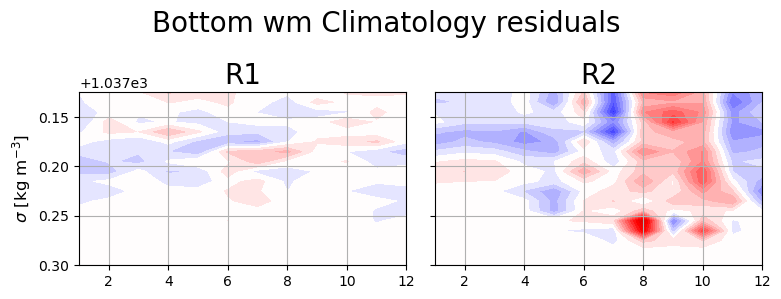

In [64]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

levels = np.arange(-20, 20) + 0.5

R1_clim = clim(clim_ds.R1)
c = ax0.contourf(R1_clim.month, 
                   R1_clim.sigma2_bin,
                   R1_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax0.set_title('R1', fontsize=20)
ax0.grid()
ax0.set_ylim(1037.3, 1037.125)

R2_clim = clim(clim_ds.R2)
c_psi = ax1.contourf(R2_clim.month, R2_clim.sigma2_bin, R2_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax1.set_title('R2', fontsize=20)
ax1.grid()


plt.suptitle('Bottom wm Climatology residuals', fontsize=20)
plt.tight_layout();

### $\frac{\partial V}{\partial t}$

In [65]:
#remember we are switching signs!
dVdt_clim_bot = - dVdt_clim.isel(sigma2_bin=-1) + dVdt_clim.sel(sigma2_bin=1037.145, method='nearest')
dVdt_clim_bot.load()

<xarray.DataArray 'dVdt' (month: 12)>
array([-16.19831731, -10.07527745,  -8.81860183,  -9.53708093,
        -2.05085931,  -1.96885808,   1.22519245,   0.87738626,
        -0.99006287,  -6.73408453, -11.44728089, -12.11348889])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

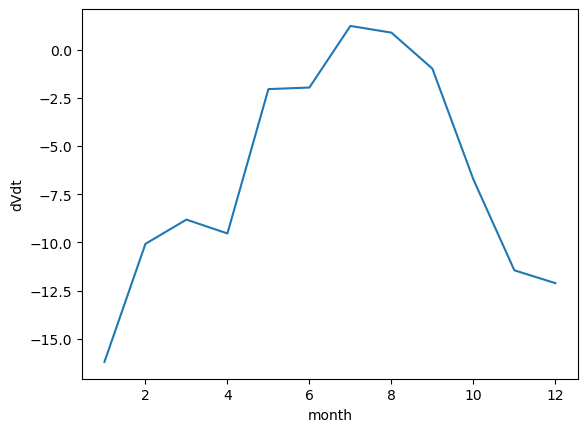

In [66]:
dVdt_clim_bot.plot();

### $\Psi$

In [67]:
#remember we are switching signs!
psi_clim_bot = - psi_vel_clim.isel(sigma2_bin=-1) + psi_vel_clim.sel(sigma2_bin=1037.145, method='nearest')
psi_clim_bot.load()

<xarray.DataArray 'psi_vel' (month: 12)>
array([-5.251806 , -2.2504435, -1.3330781, -4.7745066, -7.213679 ,
       -6.8807464, -5.94777  , -6.5849404, -6.7042346, -5.823691 ,
       -4.306391 , -1.7716308], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

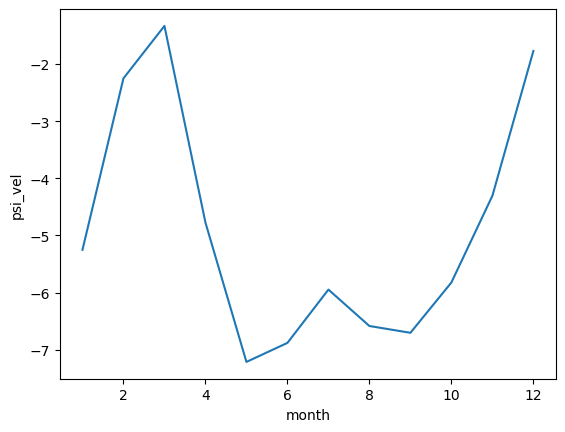

In [68]:
psi_clim_bot.plot();

### $\Omega$

In [69]:
omega_clim_bot = - omega_clim.isel(sigma2_bin=-1) + omega_clim.sel(sigma2_bin=1037.145, method='nearest')
omega_clim_bot.load()

<xarray.DataArray 'omega_trans_rate' (month: 12)>
array([-9.35989131, -6.47480456, -5.69331272, -4.23040204,  7.18559442,
        3.45524595, 15.57970957,  4.17507382,  0.63412232, -4.50349983,
       -3.86038237, -8.67104523])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [70]:
bdy_omegas[-6].name

'omega_surf_slt'

In [71]:
clim_ds

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 366)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2006-01-01 ... 2010-12-31
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_slt                (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_th                 (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R2                    (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_slt                (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_th                 (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_slt           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_th            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float32 1.132 1.132 ... 0.0 0.0

In [76]:
omega_surf_slt_clim = clim(clim_ds.omega_surf_slt).load()
omega_surf_th_clim = clim(clim_ds.omega_surf_th).load()
omega_mix_clim = clim(clim_ds.omega_mix).load()

omega_surf_slt_clim_bot = (omega_surf_slt_clim.isel(sigma2_bin=-1) + 
                           omega_surf_slt_clim.sel(sigma2_bin=1037.145, method='nearest'))
omega_surf_th_clim_bot = (omega_surf_th_clim.isel(sigma2_bin=-1) + 
                           omega_surf_th_clim.sel(sigma2_bin=1037.145, method='nearest'))
omega_mix_clim_bot = (omega_mix_clim.isel(sigma2_bin=-1) + 
                           omega_mix_clim.sel(sigma2_bin=1037.145, method='nearest'))

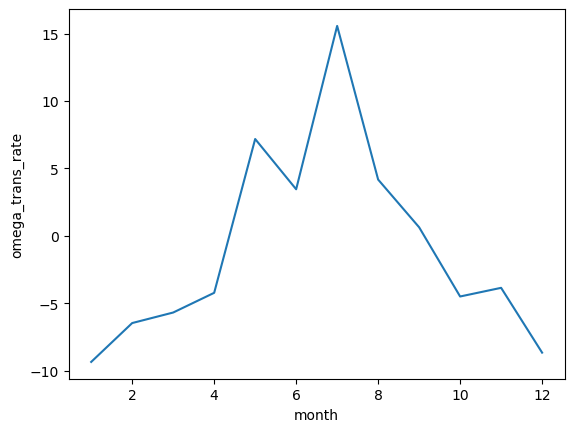

In [73]:
omega_clim_bot.plot();

### Residuals

In [77]:
#remember we are switching signs!
R1_clim_bot = - R1_clim.isel(sigma2_bin=-1) + R1_clim.sel(sigma2_bin=1037.145, method='nearest')
R1_clim_bot.load()

<xarray.DataArray 'R1' (month: 12)>
array([-1.00448441, -0.22558339, -0.39228254, -0.26044616, -0.93444857,
        0.32455805, -0.53629274, -1.05983791, -0.97822683, -0.61734683,
        0.81836094, -0.18016849])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [78]:
#remember we are switching signs!
R2_clim_bot = - R2_clim.isel(sigma2_bin=-1) + R2_clim.sel(sigma2_bin=1037.145, method='nearest')
R2_clim_bot.load()

<xarray.DataArray 'R2' (month: 12)>
array([-0.58201187, -1.12416972, -1.39963739, -0.27161094, -1.08832329,
        1.13233131, -7.87034344,  4.34706088,  6.05820878,  4.21046025,
       -4.09871594, -1.49038053])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [79]:
#remember we are switching signs!
R3_clim_bot = - clim(clim_ds.R3).isel(sigma2_bin=-1) + clim(clim_ds.R3).sel(sigma2_bin=1037.145, method='nearest')
R3_clim_bot.load()

<xarray.DataArray 'R3' (month: 12)>
array([-1.24030305e-04, -2.76364305e-04, -2.91040287e-04, -1.15336917e-04,
       -2.88505818e-06, -2.46662959e-04, -1.10583278e-04,  2.99968576e-05,
        6.77012439e-05, -7.53547932e-06, -1.52445940e-04, -2.63962348e-04])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

### __Bottom climatology budget__

In [80]:
clim_budget = - dVdt_clim_bot + psi_clim_bot + omega_clim_bot + R1_clim_bot + R2_clim_bot + R3_clim_bot
clim_budget

<xarray.DataArray (month: 12)>
array([-8.53484202e-08, -4.85571249e-08, -5.82931756e-09, -1.10575357e-07,
        1.39739992e-07,  3.60406494e-07,  2.43786614e-07,  9.14978000e-08,
        2.41599524e-07, -3.07932537e-07,  3.08504231e-07, -8.40833303e-08])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [82]:
- omega_clim_bot + omega_mix_clim_bot + omega_surf_th_clim_bot + omega_surf_slt_clim_bot

<xarray.DataArray (month: 12)>
array([-1.30451205e-15,  5.55111512e-17, -2.55351296e-15, -1.72084569e-15,
       -3.55271368e-15,  2.88657986e-15,  8.88178420e-15, -2.22044605e-16,
       -8.88178420e-16,  8.88178420e-16, -1.77635684e-15, -1.33226763e-15])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## use bottom.omega_trans instead of bdy_omegas[-3]

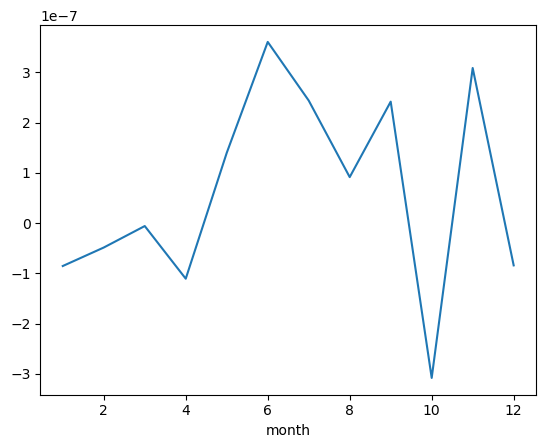

In [81]:
clim_budget.T.plot()

In [83]:
clim_sose = xr.merge([dVdt_clim.rename('dVdt_clim'), psi_vel_clim.rename('psi_vel_clim'), 
                      omega_clim.rename('omega_clim'), omega_mix__clim.rename('omega_mix__clim'), 
                      omega_surf_slt_clim.rename('omega_surf_slt_clim'), omega_surf_th_clim.rename('omega_surf_th_clim'),
                      R1_clim.rename('R1_clim'), R2_clim.rename('R2_clim')])
clim_sose

<xarray.Dataset>
Dimensions:              (sigma2_bin: 999, month: 12)
Coordinates:
  * sigma2_bin           (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month, sigma2_bin) float64 -0.0003013 ... 0.0
    psi_vel_clim         (month, sigma2_bin) float32 0.128 0.128 ... 0.0 0.0
    omega_clim           (month, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix__clim      (month, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_surf_slt_clim  (month, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_surf_th_clim   (month, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    R1_clim              (month, sigma2_bin) float64 -0.0003013 ... 0.0
    R2_clim              (month, sigma2_bin) float64 -0.128 -0.128 ... 0.0 0.0

In [84]:
#save as netcdf to stack with ecco & soda in stacked figs dir
clim_sose.to_netcdf('clim_sose', mode='w')

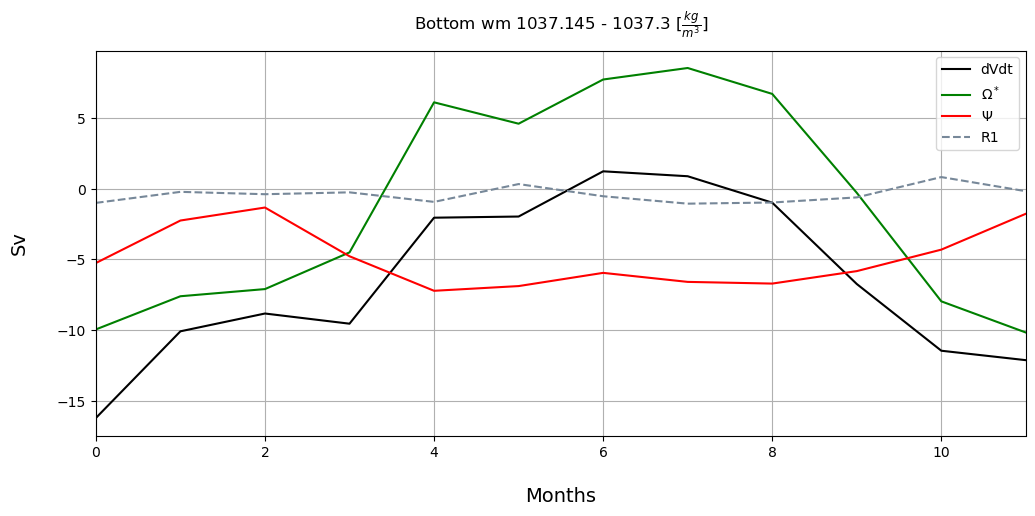

In [85]:
plt.figure(figsize=(12,5))
plt.plot(dVdt_clim_bot, label='dVdt', color='k')
plt.plot((omega_clim_bot+R2_clim_bot), label=r'$\Omega^*$', color='green')
plt.plot(psi_clim_bot, label=r'$\Psi$', color='red')
plt.plot(R1_clim_bot, label='R1', color='lightslategray', linestyle='--')
#plt.plot(R2_clim_bot, label='R2', color='salmon', linestyle='--')
plt.title(r'Bottom wm 1037.145 - 1037.3 [$\frac{kg}{m^3}$]', pad=15)
plt.ylabel('Sv', fontsize=14, labelpad=20)
plt.xlabel('Months', fontsize=14, labelpad=20)
plt.xlim(0, 11)

plt.legend()
plt.grid();

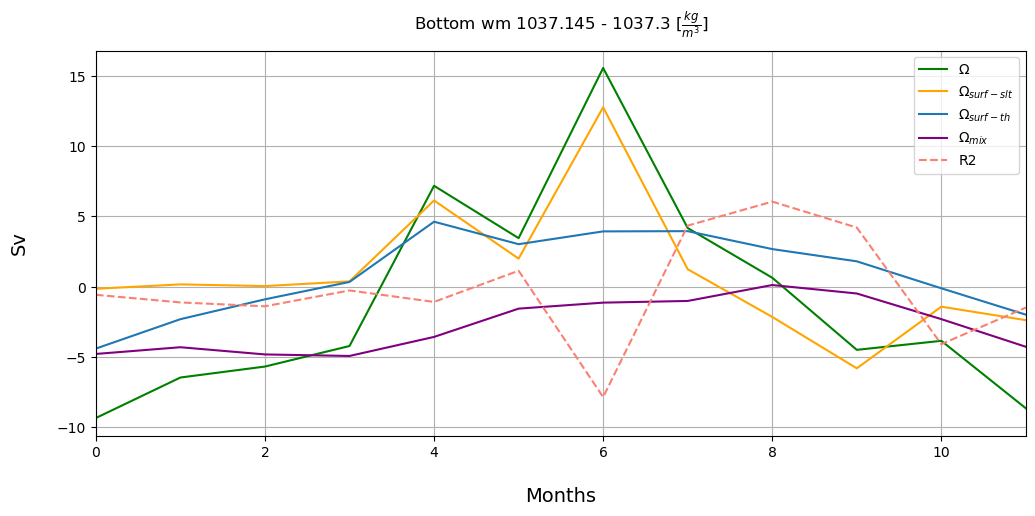

In [87]:
plt.figure(figsize=(12,5))
plt.plot(omega_clim_bot, label=r'$\Omega$', color='green')
plt.plot(omega_surf_slt_clim_bot, label=r'$\Omega_{surf-slt}$', color='orange')
plt.plot(omega_surf_th_clim_bot, label=r'$\Omega_{surf-th}$', color='C0')
plt.plot(omega_mix_clim_bot, label=r'$\Omega_{mix}$', color='purple')
plt.plot(R2_clim_bot, label='R2', color='salmon', linestyle='--')
plt.title(r'Bottom wm 1037.145 - 1037.3 [$\frac{kg}{m^3}$]', pad=15)
plt.ylabel('Sv', fontsize=14, labelpad=20)
plt.xlabel('Months', fontsize=14, labelpad=20)
plt.xlim(0, 11)

plt.legend()
plt.grid();

## Anomaly

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
year_start_index =[0,73, 146, 220, 293]

In [90]:
wmt

<xarray.Dataset>
Dimensions:               (time: 438, sigma2_bin: 999)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_slt                (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_th                 (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R2                    (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    R2_slt                (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    R2_th                 (time, sigma2_bin) float64 2.061e+07 2.061e+07 ... 0.0
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_slt           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_th            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float32 -2.061e+07 ... 0.0

In [173]:
clim_ds

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 366)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2006-01-01 ... 2010-12-31
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_slt                (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R1_th                 (time, sigma2_bin) float64 -0.004971 -0.004971 ... 0.0
    R2                    (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_slt                (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    R2_th                 (time, sigma2_bin) float64 -1.132 -1.132 ... 0.0 0.0
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_slt           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv_th            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float32 1.132 1.132 ... 0.0 0.0

In [91]:
anom_whole_timeseries_unrolled = (wmt/1e6).groupby('time.month') - clim(clim_ds)
anom_whole_timeseries = anom_whole_timeseries_unrolled.rolling(time=73, center=True).mean(dim='time')

In [92]:
anom_whole_timeseries

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 438)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
    month                 (time) int64 1 1 1 1 1 1 2 2 ... 12 12 12 12 12 12 12
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R1_slt                (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R1_th                 (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R2                    (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R2_slt                (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R2_th                 (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate_th   (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_adv               (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_adv_slt           (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_adv_th            (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_vel               (time, sigma2_bin) float32 nan nan nan ... nan nan nan

In [93]:
year_start_index_whole_series = [0,73, 146, 219, 292, 365]

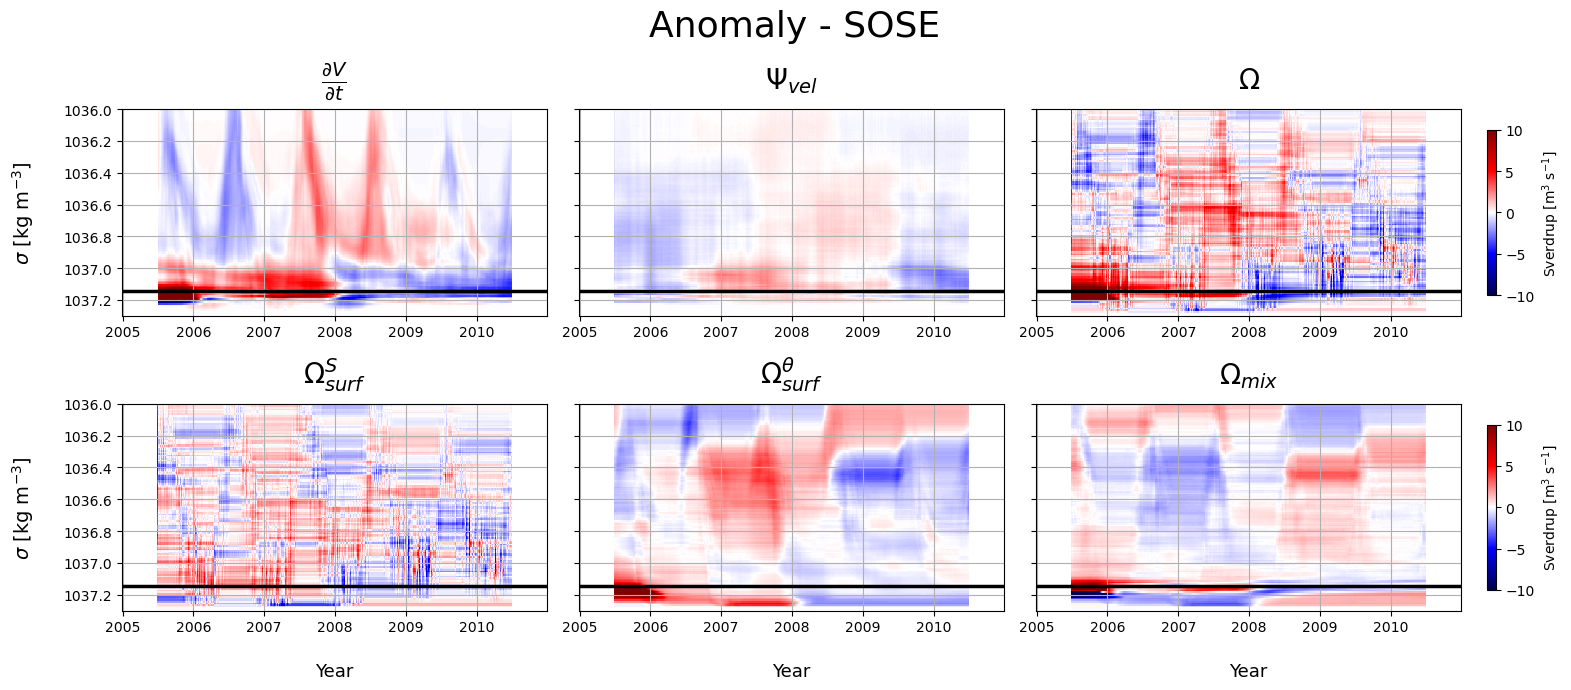

In [96]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

c = ax[0,0].pcolormesh(anom_whole_timeseries.dVdt.drop('month').time.values, 
                   anom_whole_timeseries.dVdt.sigma2_bin, 
                   anom_whole_timeseries.dVdt.T, vmin=-10, vmax=10, cmap='seismic')
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=14, labelpad=20)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20, pad=15)
ax[0,0].set_xticks(anom_whole_timeseries.time[year_start_index_whole_series])
#ax[0,0].set_xticks(np.arange(anom.dVdt.time[year_start_index].dt.year[0], anom.dVdt.time[year_start_index].dt.year[-1], 1))
ax[0,0].set_xticklabels(np.arange(2005, 2011))
ax[0,0].grid()
ax[0,0].set_ylim(1037.3, 1036)
ax[0,0].axhline(y=1037.145, color='k', linewidth=2.5)

c_psi = ax[0,1].pcolormesh(anom_whole_timeseries.psi_vel.time.values, 
                           anom_whole_timeseries.psi_vel.sigma2_bin, 
                           anom_whole_timeseries.psi_vel.T,
                        vmin=-10, vmax=10, cmap='seismic')
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20, pad=15)
#ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(anom_whole_timeseries.dVdt.time[year_start_index_whole_series])
ax[0,1].set_xticklabels(np.arange(2005, 2011))
ax[0,1].grid()
ax[0,1].axhline(y=1037.145, color='k', linewidth=2.5)

c_omega = ax[0,2].pcolormesh(anom_whole_timeseries.omega_trans_rate.time.values, 
                             anom_whole_timeseries.omega_trans_rate.sigma2_bin, 
                             anom_whole_timeseries.omega_trans_rate.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
ax[0,2].set_title(r'$\Omega$', fontsize=20, pad=15)
ax[0,2].set_xticks(anom_whole_timeseries.dVdt.time[year_start_index_whole_series])
ax[0,2].set_xticklabels(np.arange(2005, 2011))
ax[0,2].grid()
ax[0,2].axhline(y=1037.145, color='k', linewidth=2.5)

c_surf_slt = ax[1,0].pcolormesh(anom_whole_timeseries.omega_surf_slt.time.values, 
                                anom_whole_timeseries.omega_surf_slt.sigma2_bin, 
                                anom_whole_timeseries.omega_surf_slt.T, vmin=-10, vmax=10, cmap='seismic')
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=14, labelpad=20)
ax[1,0].set_xlabel('Year', fontsize=13, labelpad=20)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20, pad=15)
ax[1,0].set_xticks(anom_whole_timeseries.dVdt.time[year_start_index_whole_series])
ax[1,0].set_xticklabels(np.arange(2005, 2011))
ax[1,0].grid()
ax[1,0].axhline(y=1037.145, color='k', linewidth=2.5)

c_surf_th = ax[1,1].pcolormesh(anom_whole_timeseries.omega_surf_th.time.values, 
                               anom_whole_timeseries.omega_surf_th.sigma2_bin, 
                        anom_whole_timeseries.omega_surf_th.T, vmin=-10, vmax=10, cmap='seismic')
ax[1,1].set_xlabel('Year', fontsize=13, labelpad=20)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20, pad=15)
#ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(anom_whole_timeseries.dVdt.time[year_start_index_whole_series])
ax[1,1].set_xticklabels(np.arange(2005, 2011))
ax[1,1].grid()
ax[1,1].axhline(y=1037.145, color='k', linewidth=2.5)

c_mix = ax[1,2].pcolormesh(anom_whole_timeseries.omega_mix.time.values, 
                           anom_whole_timeseries.omega_mix.sigma2_bin, 
                           anom_whole_timeseries.omega_mix.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
ax[1,2].set_xlabel('Year', fontsize=13, labelpad=20)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20, pad=15)
ax[1,2].set_xticks(anom_whole_timeseries.dVdt.time[year_start_index_whole_series])
ax[1,2].set_xticklabels(np.arange(2005, 2011))
ax[1,2].grid()
ax[1,2].axhline(y=1037.145, color='k', linewidth=2.5)

plt.suptitle('Anomaly - SOSE', fontsize=26)
plt.tight_layout()
plt.savefig('anom-pcolor-sose.pdf', transparent=True);

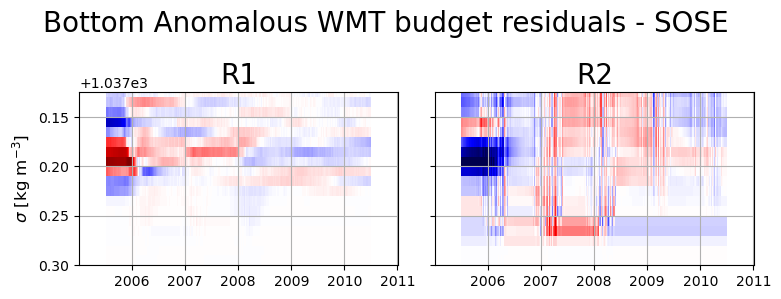

In [97]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

R1_anom = ax0.pcolormesh(anom_whole_timeseries.R1.time.values, 
                   anom_whole_timeseries.R1.sigma2_bin, 
                   anom_whole_timeseries.R1.T, vmin=-10, vmax=10, cmap='seismic')
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
#ax[0,0].set_xticks(anom.dVdt.time[year_start_index])
#ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax0.grid()
ax0.set_ylim(1037.3, 1037.125)

R2_anom = ax1.pcolormesh(anom_whole_timeseries.R2.time.values, 
                         anom_whole_timeseries.R2.sigma2_bin, 
                         anom_whole_timeseries.R2.T,
                        vmin=-10, vmax=10, cmap='seismic')
ax1.set_title('R2', fontsize=20)
#ax[0,1].set_ylim(1037.3, 1036.5)
#ax[0,1].set_xticks(anom.dVdt.time[year_start_index])
#ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax1.grid()

plt.suptitle('Bottom Anomalous WMT budget residuals - SOSE', fontsize=20)
plt.tight_layout();

## BOTTOM Anomaly budget

In [98]:
#save as netcdf to stack with ecco & soda in stacked figs dir
anom_whole_timeseries.to_netcdf('anom_sose')

In [99]:
anom_bot = - anom_whole_timeseries.isel(sigma2_bin=-1) + anom_whole_timeseries.sel(sigma2_bin=1037.145, method='nearest')
anom_bot

<xarray.Dataset>
Dimensions:               (time: 438)
Coordinates:
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
    month                 (time) int64 1 1 1 1 1 1 2 2 ... 12 12 12 12 12 12 12
Data variables: (12/27)
    R1                    (time) float64 nan nan nan nan nan ... nan nan nan nan
    R1_slt                (time) float64 nan nan nan nan nan ... nan nan nan nan
    R1_th                 (time) float64 nan nan nan nan nan ... nan nan nan nan
    R2                    (time) float64 nan nan nan nan nan ... nan nan nan nan
    R2_slt                (time) float64 nan nan nan nan nan ... nan nan nan nan
    R2_th                 (time) float64 nan nan nan nan nan ... nan nan nan nan
    ...                    ...
    omega_trans_rate_slt  (time) float64 nan nan nan nan nan ... nan nan nan nan
    omega_trans_rate_th   (time) float64 nan nan nan nan nan ... nan nan nan nan
    psi_adv               (time) float64 nan nan nan nan nan ... nan nan nan nan
    psi_adv_slt           (time) float64 nan nan nan nan nan ... nan nan nan nan
    psi_adv_th            (time) float64 nan nan nan nan nan ... nan nan nan nan
    psi_vel               (time) float32 nan nan nan nan nan ... nan nan nan nan

### $\frac{\partial V}{\partial t}$

In [100]:
#remember we're switching signs!
dVdt_anom_bot = anom_bot.dVdt
dVdt_anom_bot.load()

<xarray.DataArray 'dVdt' (time: 438)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan, 13.38059259, 13.40871635, 13.49431335,
       13.45134461, 13.60449309, 13.58712855, 13.64398893, 13.84460051,
       13.99822567, 14.0795326 , 14.23397492, 14.34265655, 14.43540366,
       14.56505894, 14.6604618 , 14.75702229, 14.94585322, 15.08769773,
       15.27884393, 15.28912647, 15.38929606, 15.55007133, 15.47754882,
       15.0354679 , 15.05637345, 14.80979689, 14.69028796, 14.20932407,
       13.12053298, 11.44706739, 10.22902959,  9.46839437,  8.73247809,
        8.18083029,  7.46827103,  6.742433  ,  6.00270333,  5.24989918,
        4.64976684,  4.0988681 ,  3.71677998,  3.25427019,  2.72856706,
        2.47879146,  2.28179623,  2.21418124,  2.15581371,  2.22438529,
        2.22642568,  2.21975786,  2.08275086,  1.85803241,  1.69125664,
        1.58374931,  1.38551335,  1.24226287,  1.15248923,  0.89310048,
        0.66633993,  0.40525887,  0.19021088,  0.12919663,  0.1206846 ,
...
       -3.56463661, -3.55905272, -3.53712572, -3.51070437, -3.34781812,
       -3.26310637, -3.21775427, -3.27808755, -3.21632424, -3.16947402,
       -3.1770327 , -3.27740659, -3.23865982, -3.15496951, -3.08925662,
       -3.16709065, -3.01639363, -2.9549708 , -2.92310175, -2.89994902,
       -2.91247873, -2.91574735, -2.92208031, -2.89143699, -3.05820473,
       -3.19010718, -3.08374083, -3.1278672 , -3.21394087, -3.34134898,
       -3.37383089, -3.29014059, -3.2790409 , -3.24642279, -3.16634159,
       -3.03491581, -3.07087063, -3.01026496, -3.05602565, -3.07454783,
       -3.10022012, -3.01060544, -3.02946811, -3.03716298, -3.11322651,
       -3.07972315, -2.99814383, -3.10130966, -3.28033473, -3.32316728,
       -3.37063037, -3.3790743 , -3.50832101, -3.56994812, -3.56068703,
       -3.44737485, -3.41605057, -3.4648075 , -3.51901212, -3.48441922,
       -3.45792977, -3.43395989,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan])
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    month    (time) int64 1 1 1 1 1 1 2 2 2 2 ... 11 11 11 12 12 12 12 12 12 12

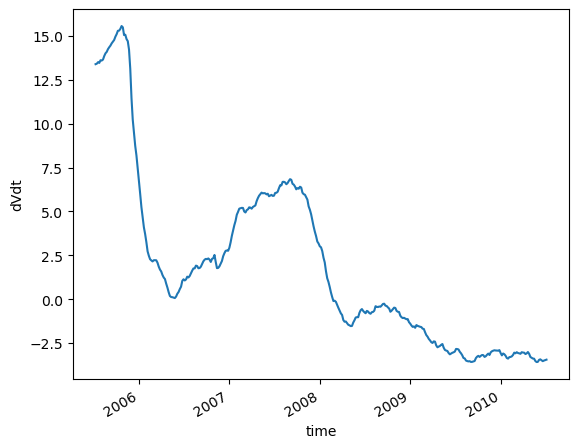

In [240]:
anom_bot.dVdt.plot()

### $\Psi$

In [101]:
#remember we're switching signs!
psi_anom_bot = anom_bot.psi_vel

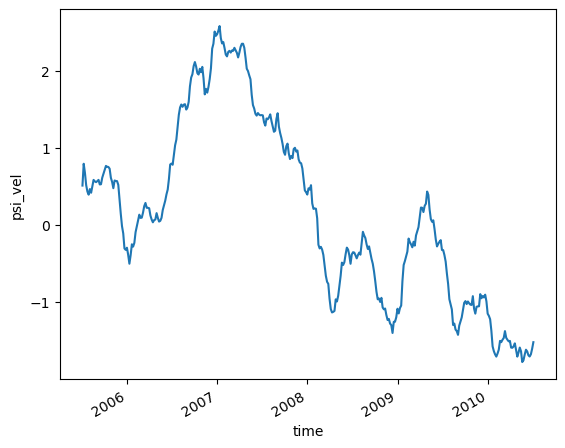

In [241]:
anom_bot.psi_vel.plot()

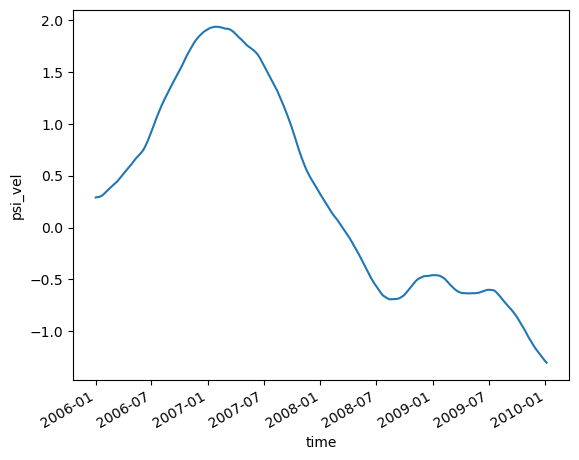

In [201]:
psi_anom_bot.rolling(time=73, center=True).mean(dim='time').plot();

### $\Omega$

In [102]:
omega_anom_bot = anom_bot.omega_trans_rate

In [103]:
omega_surf_slt_anom_bot = anom_bot.omega_surf_slt
omega_surf_th_anom_bot = anom_bot.omega_surf_th
omega_mix_anom_bot = anom_bot.omega_mix

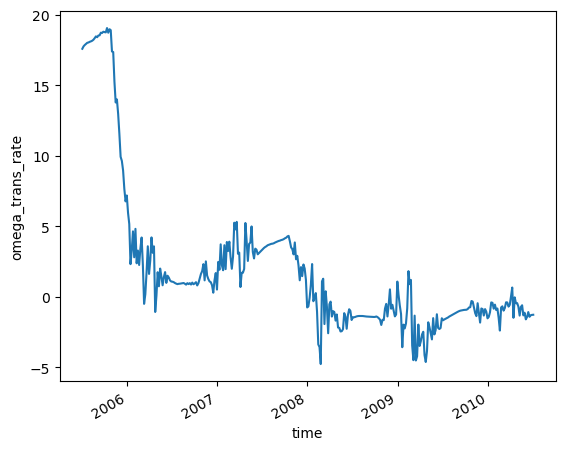

In [206]:
omega_anom_bot.plot();

### Residuals

In [104]:
R1_anom_bot = anom_bot.R1
R2_anom_bot = anom_bot.R2
R3_anom_bot = anom_bot.R3

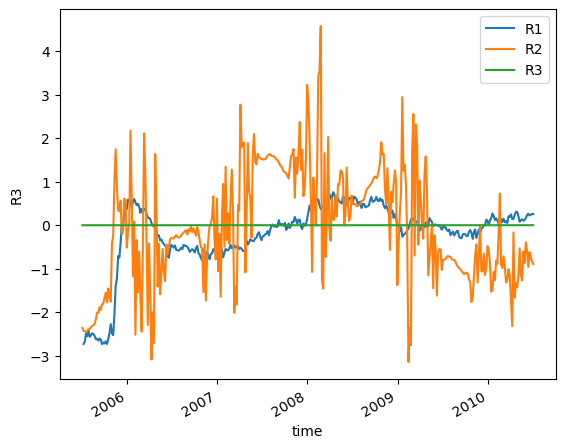

In [105]:
R1_anom_bot.plot(label='R1')
R2_anom_bot.plot(label='R2')
R3_anom_bot.plot(label='R3')
plt.legend();

In [225]:
dVdt_anom_bot.time[-37]

<xarray.DataArray 'time' ()>
array('2010-07-04T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2010-07-04
    month    int64 7

In [250]:
anom_bot.time[35]

<xarray.DataArray 'time' ()>
array('2005-06-30T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2005-06-30
    month    int64 6

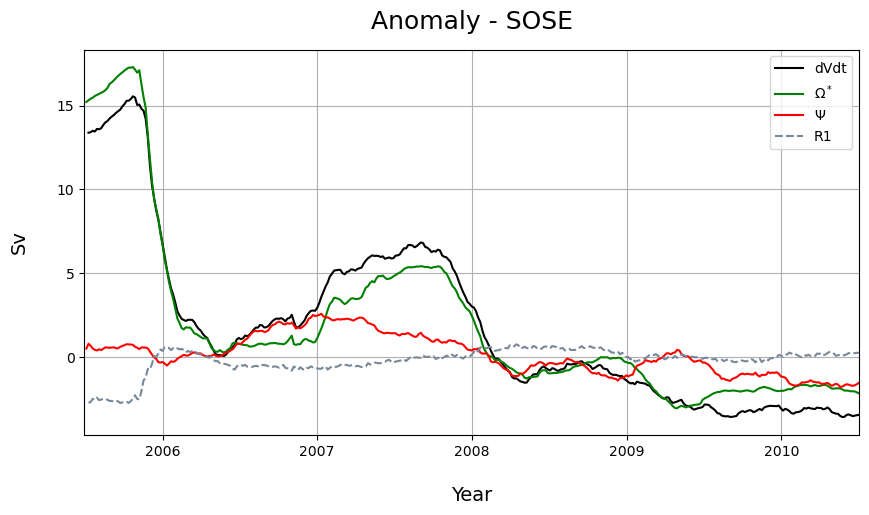

In [106]:
fig = plt.subplots(figsize=(10,5))
plt.plot(dVdt_anom_bot.time, dVdt_anom_bot, label='dVdt', color='k')
plt.plot(omega_anom_bot.time, (omega_anom_bot+R2_anom_bot), label=r'$\Omega^*$', color='green')
plt.plot(psi_anom_bot.time, psi_anom_bot, label=r'$\Psi$', color='red')
plt.plot(R1_anom_bot.time, R1_anom_bot, label='R1', color='lightslategray', linestyle='--')
#plt.plot(R2_anom_bot.time, R2_anom_bot, label='R2', color='salmon', linestyle='--')
plt.title('Anomaly - SOSE', fontsize=18, pad=15)
plt.ylabel('Sv', fontsize=14, labelpad=20)
plt.xlabel('Year', fontsize=14, labelpad=20)
plt.xlim(dVdt_anom_bot.time[35], dVdt_anom_bot.time[-37]) #2007-2010

plt.legend()
plt.grid();

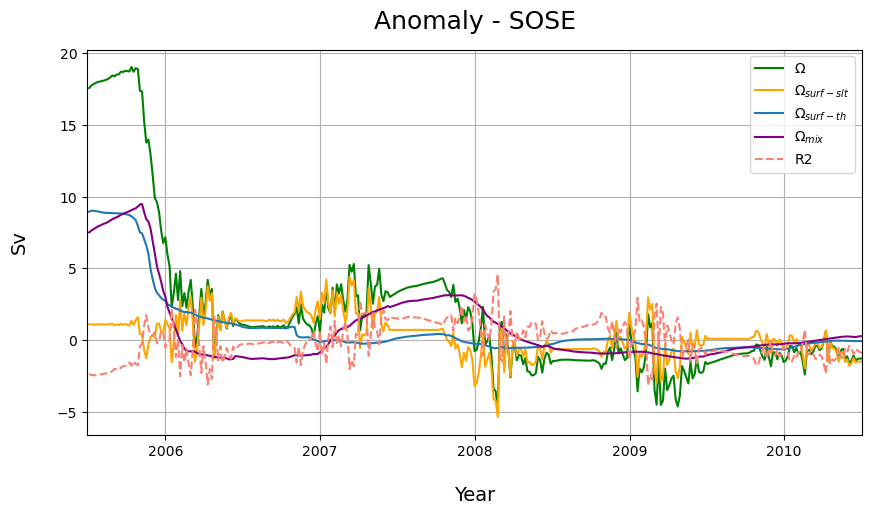

In [107]:
fig = plt.subplots(figsize=(10,5))
plt.plot(omega_anom_bot.time, omega_anom_bot, label=r'$\Omega$', color='green')
plt.plot(omega_surf_slt_anom_bot.time, omega_surf_slt_anom_bot, 
         label=r'$\Omega_{surf-slt}$', color='orange')
plt.plot(omega_surf_th_anom_bot.time, omega_surf_th_anom_bot, 
         label=r'$\Omega_{surf-th}$', color='C0')
plt.plot(omega_mix_anom_bot.time, omega_mix_anom_bot, label=r'$\Omega_{mix}$', color='purple')
plt.plot(R2_anom_bot.time, R2_anom_bot, label='R2', color='salmon', linestyle='--')
plt.title('Anomaly - SOSE', fontsize=18, pad=15)
plt.ylabel('Sv', fontsize=14, labelpad=20)
plt.xlabel('Year', fontsize=14, labelpad=20)
plt.xlim(omega_anom_bot.time[35], dVdt_anom_bot.time[-37]) #2006-2010

plt.legend()
plt.grid();

### __Bottom anomaly budget__

In [108]:
(- dVdt_anom_bot + psi_anom_bot + omega_anom_bot + R1_anom_bot + R2_anom_bot + R3_anom_bot).mean('time')

<xarray.DataArray ()>
array(1.64645338e-07)

In [109]:
anom_budget = - dVdt_anom_bot + psi_anom_bot + omega_anom_bot + R1_anom_bot + R2_anom_bot
anom_budget

<xarray.DataArray (time: 438)>
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  3.71988393e-04,  3.59413797e-04,  3.41789029e-04,
        3.35751427e-04,  3.13376853e-04,  3.12115098e-04,  3.25992463e-04,
        3.39264373e-04,  3.21021340e-04,  3.23537743e-04,  3.12699130e-04,
        3.09999517e-04,  3.20209139e-04,  3.10537856e-04,  2.89541070e-04,
        2.94716364e-04,  2.69479054e-04,  2.54040721e-04,  2.50220572e-04,
        2.57820775e-04,  2.58722973e-04,  2.70396753e-04,  2.79276334e-04,
        3.09114872e-04,  3.10514902e-04,  3.58798782e-04,  3.54578777e-04,
        3.79346233e-04,  3.85006202e-04,  4.09377540e-04,  4.00399978e-04,
        3.93110492e-04,  3.82072387e-04,  4.23272810e-04,  4.15168774e-04,
        3.72456621e-04,  3.80959323e-04,  3.72307913e-04,  3.37724412e-04,
        3.38725185e-04,  3.31782140e-04,  3.45710606e-04,  3.21644740e-04,
...
       -1.78796032e-04, -1.52790364e-04, -1.37990583e-04, -1.29713639e-04,
       -1.26651974e-04, -9.43934715e-05, -8.61372215e-05, -9.01640406e-05,
       -8.39135162e-05, -6.37531417e-05, -5.60893133e-05, -3.12709461e-05,
       -1.78937725e-05, -1.91117028e-05, -2.37650990e-05, -1.71567893e-05,
       -1.16603747e-05,  7.97367876e-06, -1.65371513e-05, -1.56554138e-05,
       -2.24151124e-05, -4.14381890e-05, -5.33033740e-05, -5.94266543e-05,
       -4.31129115e-05, -3.05007353e-05, -3.13275918e-05, -7.51134209e-07,
        2.16243322e-05,  1.45475041e-05, -5.57982018e-06,  2.27397864e-05,
        3.86060982e-05,  3.26354651e-05,  4.02455755e-05,  5.68744343e-05,
        3.37775161e-05,  7.86615504e-05,  7.17746276e-05,  7.63011902e-05,
        5.46554383e-05,  6.76064509e-05,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan])
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    month    (time) int64 1 1 1 1 1 1 2 2 2 2 ... 11 11 11 12 12 12 12 12 12 12

In [110]:
anom_bdgt_nores = - dVdt_anom_bot + psi_anom_bot + omega_anom_bot
anom_bdgt_nores

<xarray.DataArray (time: 438)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  5.15896215,  5.11065785,  4.94193327,
        4.97889649,  4.80771145,  4.94542321,  4.87319719,  4.79900402,
        4.79966811,  4.81174108,  4.77216399,  4.61661922,  4.66488237,
        4.4862593 ,  4.58188424,  4.54831468,  4.49973971,  4.38232396,
        4.22119938,  4.50734417,  4.07378693,  4.13785385,  4.02999097,
        2.90452763,  2.76276368,  1.00522828, -0.35292417,  0.34695877,
        0.36038574,  0.42435961, -0.16198097,  0.14526213,  0.10996478,
       -0.83488752, -1.02859329,  0.14240004, -0.43565499, -0.59462076,
       -2.72505096, -1.04729973,  0.64060245, -0.68552358,  1.9948308 ,
       -0.1178538 ,  1.05196268,  0.17462026,  1.35181901,  2.07252193,
        0.22159825, -2.47394847, -1.61125972,  0.1003509 ,  2.11199858,
        0.25559831,  1.31777048,  3.0373246 ,  2.00077982,  2.74307311,
       -1.6695035 , -0.17341855,  1.64527731,  0.66083308,  1.93391419,
...
        1.08323814,  1.24058083,  1.30713524,  1.34937284,  1.29909154,
        1.32520016,  1.31015215,  1.33726008,  1.36264167,  1.3972507 ,
        1.40763686,  1.94351504,  1.97780815,  1.31492168,  0.78389711,
        0.73692888,  1.50604282,  0.73316412,  0.20097715,  1.12134991,
        1.12318885,  0.64698904,  1.14748805,  0.84914322,  0.38425022,
        0.58867255,  0.76957024,  1.36021355,  1.21337068,  0.86300234,
        1.14276581,  0.6494347 ,  0.78350075,  0.1443008 , -0.72885136,
        0.76103572,  0.90741209,  0.56473702,  0.88311996,  1.22313843,
        1.21156   ,  0.80696496,  0.95680159,  1.46371019,  2.17854395,
        0.01948851,  1.42510355,  1.02640907,  1.12525261,  0.96825574,
        0.45054779,  1.02244412,  1.13218329,  0.50002103,  0.75385758,
        0.23259474,  0.34788187,  0.69400538,  0.39801265,  0.50269986,
        0.57230542,  0.64163545,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan])
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    month    (time) int64 1 1 1 1 1 1 2 2 2 2 ... 11 11 11 12 12 12 12 12 12 12

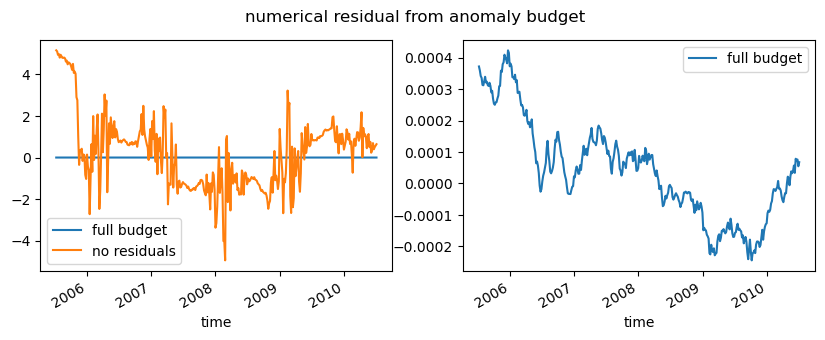

In [112]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
anom_budget.plot(ax=ax0, label='full budget')
anom_bdgt_nores.plot(ax=ax0, label='no residuals')
ax0.legend()

anom_budget.plot(ax=ax1, label='full budget')

plt.legend()
plt.suptitle('numerical residual from anomaly budget');

## Indices

In [113]:
indices

<xarray.Dataset>
Dimensions:          (time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    enso             (time) float32 -0.7034 -0.6278 -0.392 ... -1.47 -1.44
    fw_flx           (time) float32 0.06174 0.3266 -0.6006 ... -0.1008 0.9542
    heat_flx         (time) float32 0.9099 0.5741 0.6695 ... 0.2288 -0.04812
    sam              (time) float64 0.09698 -0.8633 0.9374 ... 2.196 0.05417
    windstress_curl  (time) float32 0.1545 0.4456 0.4518 ... -2.025 -0.3768
    sose_si_index    (time) float32 -0.1046 -0.3231 -0.7317 ... -0.6133 -0.5124

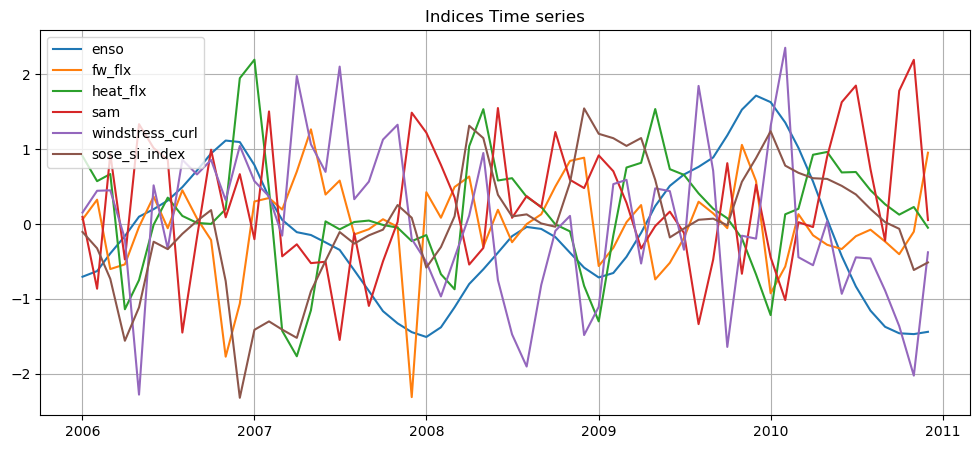

In [114]:
fig, ax = plt.subplots(figsize=(12,5))
for i in indices.variables:
    if i =='time':
        continue
    ax.plot(indices.time, indices[i], label=f'{indices[i].name}')
    
plt.legend()
plt.grid()
plt.title('Indices Time series');

## Heat map of Corralation matrices

In [115]:
import seaborn as sn

In [116]:
indices_df = indices.to_dataframe()
indices_df.head()

enso    fw_flx  heat_flx       sam  windstress_curl  \
time                                                                  
2006-01-01 -0.703412  0.061736  0.909883  0.096981         0.154478   
2006-02-01 -0.627783  0.326616  0.574079 -0.863304         0.445615   
2006-03-01 -0.392023 -0.600639  0.669474  0.937425         0.451785   
2006-04-01 -0.160018 -0.538129 -1.137979 -0.472696        -0.196582   
2006-05-01  0.099242 -0.036327 -0.748289  1.336000        -2.279050   

            sose_si_index  
time                       
2006-01-01      -0.104589  
2006-02-01      -0.323054  
2006-03-01      -0.731677  
2006-04-01      -1.559040  
2006-05-01      -1.112916

In [117]:
omega_star = omega_anom_bot + R2_anom_bot

In [118]:
ds = xr.merge([dVdt_anom_bot.rename('dvdt'), psi_anom_bot.rename('psi'), omega_star.rename('omega*')])
ds.drop('month')

<xarray.Dataset>
Dimensions:  (time: 438)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    dvdt     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    psi      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    omega*   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [119]:
ds_omega = xr.merge([omega_anom_bot.rename('omega'), omega_mix_anom_bot.rename('mix'),
                     omega_surf_slt_anom_bot.rename('surf_slt'), omega_surf_th_anom_bot.rename('surf_th')])
omega_df = ds_omega.drop('month').resample(time='MS').mean().to_dataframe()

In [120]:
budget_df = ds.drop('month').resample(time='MS').mean().to_dataframe()

In [121]:
budget_df.head(13)

dvdt       psi     omega*
time                                      
2005-01-01        NaN       NaN        NaN
2005-02-01        NaN       NaN        NaN
2005-03-01        NaN       NaN        NaN
2005-04-01        NaN       NaN        NaN
2005-05-01        NaN       NaN        NaN
2005-06-01        NaN       NaN        NaN
2005-07-01  13.467892  0.555362  15.433171
2005-08-01  13.897909  0.516029  15.923176
2005-09-01  14.617743  0.581751  16.691253
2005-10-01  15.345431  0.723020  17.203974
2005-11-01  14.486964  0.546434  15.670760
2005-12-01   9.254345 -0.043916   9.365524
2006-01-01   4.816389 -0.333055   4.633516

In [122]:
omega_df.head()

omega  mix  surf_slt  surf_th
time                                     
2005-01-01    NaN  NaN       NaN      NaN
2005-02-01    NaN  NaN       NaN      NaN
2005-03-01    NaN  NaN       NaN      NaN
2005-04-01    NaN  NaN       NaN      NaN
2005-05-01    NaN  NaN       NaN      NaN

### Correlation matrix of all terms (budget & indices)

In [123]:
indices_df.head()

enso    fw_flx  heat_flx       sam  windstress_curl  \
time                                                                  
2006-01-01 -0.703412  0.061736  0.909883  0.096981         0.154478   
2006-02-01 -0.627783  0.326616  0.574079 -0.863304         0.445615   
2006-03-01 -0.392023 -0.600639  0.669474  0.937425         0.451785   
2006-04-01 -0.160018 -0.538129 -1.137979 -0.472696        -0.196582   
2006-05-01  0.099242 -0.036327 -0.748289  1.336000        -2.279050   

            sose_si_index  
time                       
2006-01-01      -0.104589  
2006-02-01      -0.323054  
2006-03-01      -0.731677  
2006-04-01      -1.559040  
2006-05-01      -1.112916

In [124]:
budget_ind = pd.concat([budget_df, indices_df], axis=1)
budget_ind.head(13)

dvdt       psi     omega*      enso    fw_flx  heat_flx  \
time                                                                       
2005-01-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-02-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-03-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-04-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-05-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-06-01        NaN       NaN        NaN       NaN       NaN       NaN   
2005-07-01  13.467892  0.555362  15.433171       NaN       NaN       NaN   
2005-08-01  13.897909  0.516029  15.923176       NaN       NaN       NaN   
2005-09-01  14.617743  0.581751  16.691253       NaN       NaN       NaN   
2005-10-01  15.345431  0.723020  17.203974       NaN       NaN       NaN   
2005-11-01  14.486964  0.546434  15.670760       NaN       NaN       NaN   
2005-12-01   9.254345 -0.043916   9.365524       NaN       NaN       NaN   
2006-01-01   4.816389 -0.333055   4.633516 -0.703412  0.061736  0.909883   

                 sam  windstress_curl  sose_si_index  
time                                                  
2005-01-01       NaN              NaN            NaN  
2005-02-01       NaN              NaN            NaN  
2005-03-01       NaN              NaN            NaN  
2005-04-01       NaN              NaN            NaN  
2005-05-01       NaN              NaN            NaN  
2005-06-01       NaN              NaN            NaN  
2005-07-01       NaN              NaN            NaN  
2005-08-01       NaN              NaN            NaN  
2005-09-01       NaN              NaN            NaN  
2005-10-01       NaN              NaN            NaN  
2005-11-01       NaN              NaN            NaN  
2005-12-01       NaN              NaN            NaN  
2006-01-01  0.096981         0.154478      -0.104589

In [125]:
omega_ind = pd.concat([omega_df, indices_df], axis=1)
omega_ind.head(13)

omega       mix  surf_slt   surf_th      enso    fw_flx  \
time                                                                      
2005-01-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-02-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-03-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-04-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-05-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-06-01        NaN       NaN       NaN       NaN       NaN       NaN   
2005-07-01  17.848188  7.765821  1.097533  8.984834       NaN       NaN   
2005-08-01  18.215412  8.226920  1.110923  8.877570       NaN       NaN   
2005-09-01  18.602275  8.688029  1.087003  8.827244       NaN       NaN   
2005-10-01  18.847827  9.100720  1.251344  8.495763       NaN       NaN   
2005-11-01  15.111686  8.721302 -0.205876  6.596260       NaN       NaN   
2005-12-01   9.073949  5.054200  0.663399  3.356349       NaN       NaN   
2006-01-01   4.477280  1.560772  0.540031  2.376476 -0.703412  0.061736   

            heat_flx       sam  windstress_curl  sose_si_index  
time                                                            
2005-01-01       NaN       NaN              NaN            NaN  
2005-02-01       NaN       NaN              NaN            NaN  
2005-03-01       NaN       NaN              NaN            NaN  
2005-04-01       NaN       NaN              NaN            NaN  
2005-05-01       NaN       NaN              NaN            NaN  
2005-06-01       NaN       NaN              NaN            NaN  
2005-07-01       NaN       NaN              NaN            NaN  
2005-08-01       NaN       NaN              NaN            NaN  
2005-09-01       NaN       NaN              NaN            NaN  
2005-10-01       NaN       NaN              NaN            NaN  
2005-11-01       NaN       NaN              NaN            NaN  
2005-12-01       NaN       NaN              NaN            NaN  
2006-01-01  0.909883  0.096981         0.154478      -0.104589

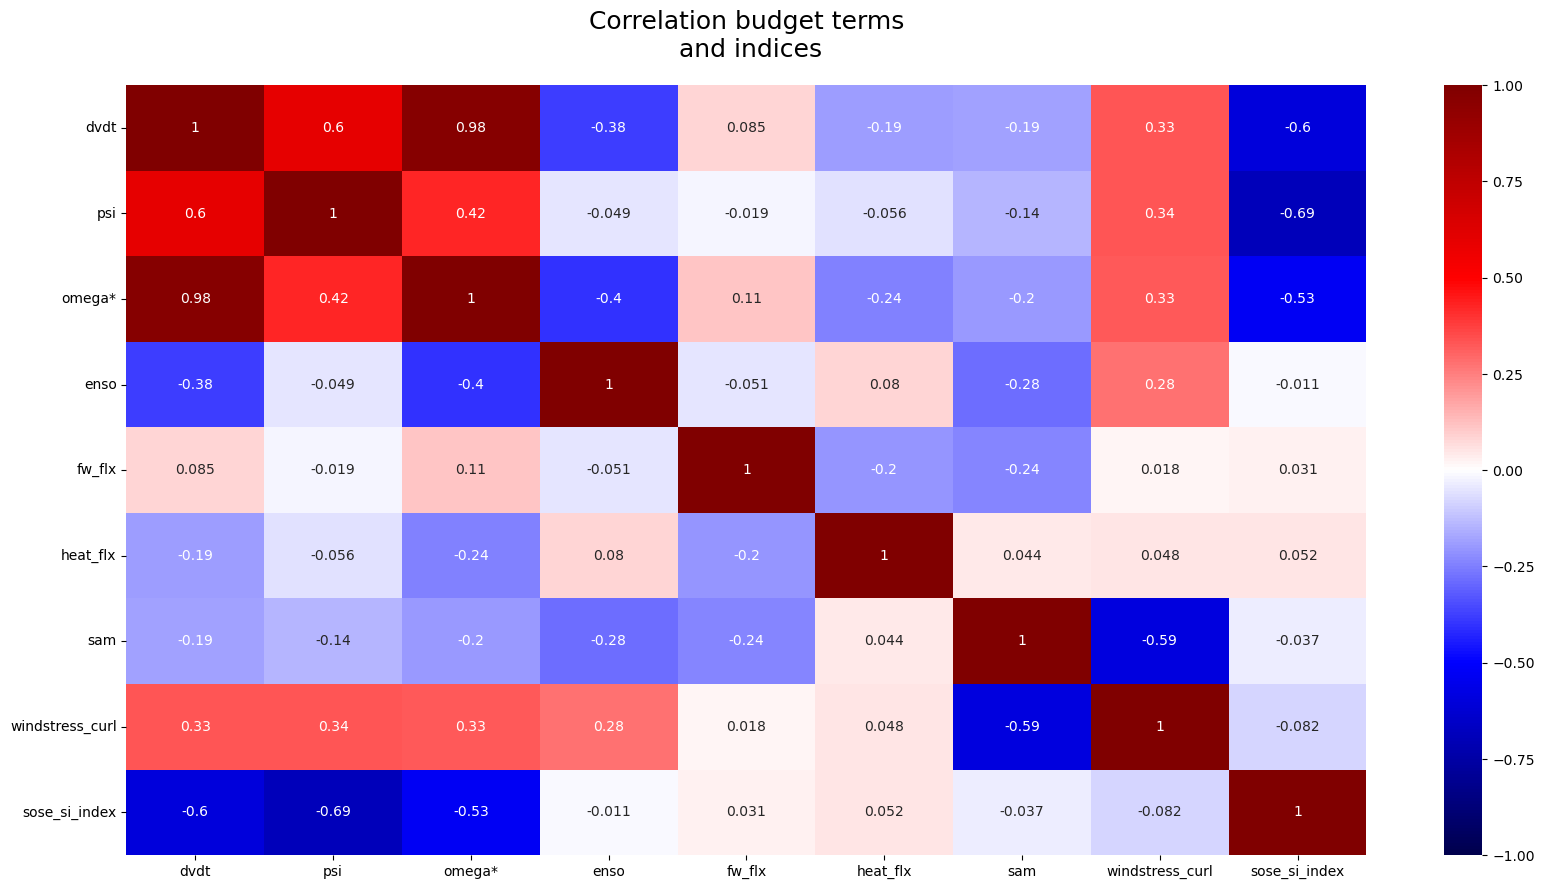

In [126]:
plt.figure(figsize=(20,10))
sn.heatmap(budget_ind.corr(), annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation budget terms\n and indices', fontsize=18, pad=20.5);

In [127]:
corr = budget_ind.corr()
corr

dvdt       psi    omega*      enso    fw_flx  heat_flx  \
dvdt             1.000000  0.595182  0.975655 -0.376793  0.085441 -0.188948   
psi              0.595182  1.000000  0.424135 -0.048829 -0.019124 -0.056073   
omega*           0.975655  0.424135  1.000000 -0.404661  0.112696 -0.243564   
enso            -0.376793 -0.048829 -0.404661  1.000000 -0.050652  0.080254   
fw_flx           0.085441 -0.019124  0.112696 -0.050652  1.000000 -0.203783   
heat_flx        -0.188948 -0.056073 -0.243564  0.080254 -0.203783  1.000000   
sam             -0.187249 -0.144007 -0.200589 -0.283055 -0.238027  0.044157   
windstress_curl  0.329056  0.335810  0.326426  0.276552  0.017578  0.047809   
sose_si_index   -0.597766 -0.693117 -0.529827 -0.011205  0.030909  0.051822   

                      sam  windstress_curl  sose_si_index  
dvdt            -0.187249         0.329056      -0.597766  
psi             -0.144007         0.335810      -0.693117  
omega*          -0.200589         0.326426      -0.529827  
enso            -0.283055         0.276552      -0.011205  
fw_flx          -0.238027         0.017578       0.030909  
heat_flx         0.044157         0.047809       0.051822  
sam              1.000000        -0.589282      -0.036725  
windstress_curl -0.589282         1.000000      -0.082484  
sose_si_index   -0.036725        -0.082484       1.000000

In [128]:
corr.iloc[:, :3]

dvdt       psi    omega*
dvdt             1.000000  0.595182  0.975655
psi              0.595182  1.000000  0.424135
omega*           0.975655  0.424135  1.000000
enso            -0.376793 -0.048829 -0.404661
fw_flx           0.085441 -0.019124  0.112696
heat_flx        -0.188948 -0.056073 -0.243564
sam             -0.187249 -0.144007 -0.200589
windstress_curl  0.329056  0.335810  0.326426
sose_si_index   -0.597766 -0.693117 -0.529827

In [129]:
corr.iloc[0, 1]

0.5951818549428646

In [130]:
dvdt_psi = corr.iloc[0, 1]
dvdt_omega = corr.iloc[0, 2]
psi_omega = corr.iloc[2, 1]

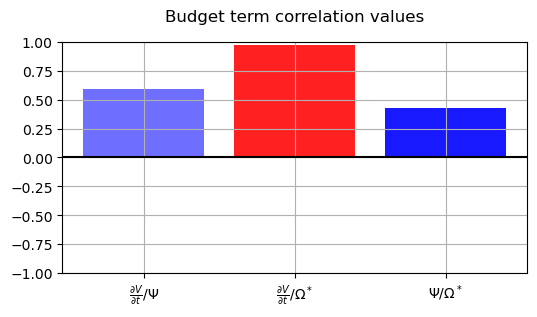

In [131]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3))

ax0.bar(x=r'$\frac{\partial V}{\partial t}/\Psi$', height = dvdt_psi, color='Blue', alpha=0.57)
ax0.bar(x=r'$\frac{\partial V}{\partial t}/\Omega^*$', height = dvdt_omega, color='red', alpha=0.87)
ax0.bar(x=r'$\Psi/\Omega^*$', height= psi_omega, color='Blue', alpha=0.9)
ax0.axhline(y=0, color='k')
ax0.set_title(r'Budget term correlation values', fontsize=12, pad=15)
ax0.set_ylabel('')
ax0.grid()
ax0.set_ylim(-1,1);

In [132]:
budget_df['psi']

time
2005-01-01   NaN
2005-02-01   NaN
2005-03-01   NaN
2005-04-01   NaN
2005-05-01   NaN
              ..
2010-08-01   NaN
2010-09-01   NaN
2010-10-01   NaN
2010-11-01   NaN
2010-12-01   NaN
Name: psi, Length: 72, dtype: float32

In [133]:
omega_ind['psi'] = budget_df['psi']

In [134]:
omega_ind

omega  mix  surf_slt  surf_th      enso    fw_flx  heat_flx  \
time                                                                      
2005-01-01    NaN  NaN       NaN      NaN       NaN       NaN       NaN   
2005-02-01    NaN  NaN       NaN      NaN       NaN       NaN       NaN   
2005-03-01    NaN  NaN       NaN      NaN       NaN       NaN       NaN   
2005-04-01    NaN  NaN       NaN      NaN       NaN       NaN       NaN   
2005-05-01    NaN  NaN       NaN      NaN       NaN       NaN       NaN   
...           ...  ...       ...      ...       ...       ...       ...   
2010-08-01    NaN  NaN       NaN      NaN -1.156375 -0.074501  0.452923   
2010-09-01    NaN  NaN       NaN      NaN -1.372571 -0.232771  0.265406   
2010-10-01    NaN  NaN       NaN      NaN -1.459237 -0.402171  0.126579   
2010-11-01    NaN  NaN       NaN      NaN -1.470133 -0.100824  0.228844   
2010-12-01    NaN  NaN       NaN      NaN -1.439778  0.954187 -0.048120   

                 sam  windstress_curl  sose_si_index  psi  
time                                                       
2005-01-01       NaN              NaN            NaN  NaN  
2005-02-01       NaN              NaN            NaN  NaN  
2005-03-01       NaN              NaN            NaN  NaN  
2005-04-01       NaN              NaN            NaN  NaN  
2005-05-01       NaN              NaN            NaN  NaN  
...              ...              ...            ...  ...  
2010-08-01  0.734237        -0.459329       0.201989  NaN  
2010-09-01 -0.221001        -0.887641       0.026703  NaN  
2010-10-01  1.782519        -1.363300      -0.062656  NaN  
2010-11-01  2.195852        -2.025066      -0.613312  NaN  
2010-12-01  0.054173        -0.376755      -0.512383  NaN  

[72 rows x 11 columns]

In [135]:
corr_omega = omega_ind.corr()
corr_omega

omega       mix  surf_slt   surf_th      enso    fw_flx  \
omega            1.000000  0.913382  0.412044  0.949394 -0.182104  0.047559   
mix              0.913382  1.000000  0.089621  0.829380 -0.528332  0.071242   
surf_slt         0.412044  0.089621  1.000000  0.283101  0.337718  0.027425   
surf_th          0.949394  0.829380  0.283101  1.000000 -0.146347 -0.044733   
enso            -0.182104 -0.528332  0.337718 -0.146347  1.000000 -0.050652   
fw_flx           0.047559  0.071242  0.027425 -0.044733 -0.050652  1.000000   
heat_flx        -0.213045 -0.238851 -0.088388 -0.019124  0.080254 -0.203783   
sam             -0.235794 -0.149181 -0.238014  0.012802 -0.283055 -0.238027   
windstress_curl  0.341897  0.259998  0.281799  0.012977  0.276552  0.017578   
sose_si_index   -0.595294 -0.161713 -0.609672 -0.369427 -0.011205  0.030909   
psi              0.355260  0.223996  0.661763  0.182910 -0.048829 -0.019124   

                 heat_flx       sam  windstress_curl  sose_si_index       psi  
omega           -0.213045 -0.235794         0.341897      -0.595294  0.355260  
mix             -0.238851 -0.149181         0.259998      -0.161713  0.223996  
surf_slt        -0.088388 -0.238014         0.281799      -0.609672  0.661763  
surf_th         -0.019124  0.012802         0.012977      -0.369427  0.182910  
enso             0.080254 -0.283055         0.276552      -0.011205 -0.048829  
fw_flx          -0.203783 -0.238027         0.017578       0.030909 -0.019124  
heat_flx         1.000000  0.044157         0.047809       0.051822 -0.056073  
sam              0.044157  1.000000        -0.589282      -0.036725 -0.144007  
windstress_curl  0.047809 -0.589282         1.000000      -0.082484  0.335810  
sose_si_index    0.051822 -0.036725        -0.082484       1.000000 -0.693117  
psi             -0.056073 -0.144007         0.335810      -0.693117  1.000000

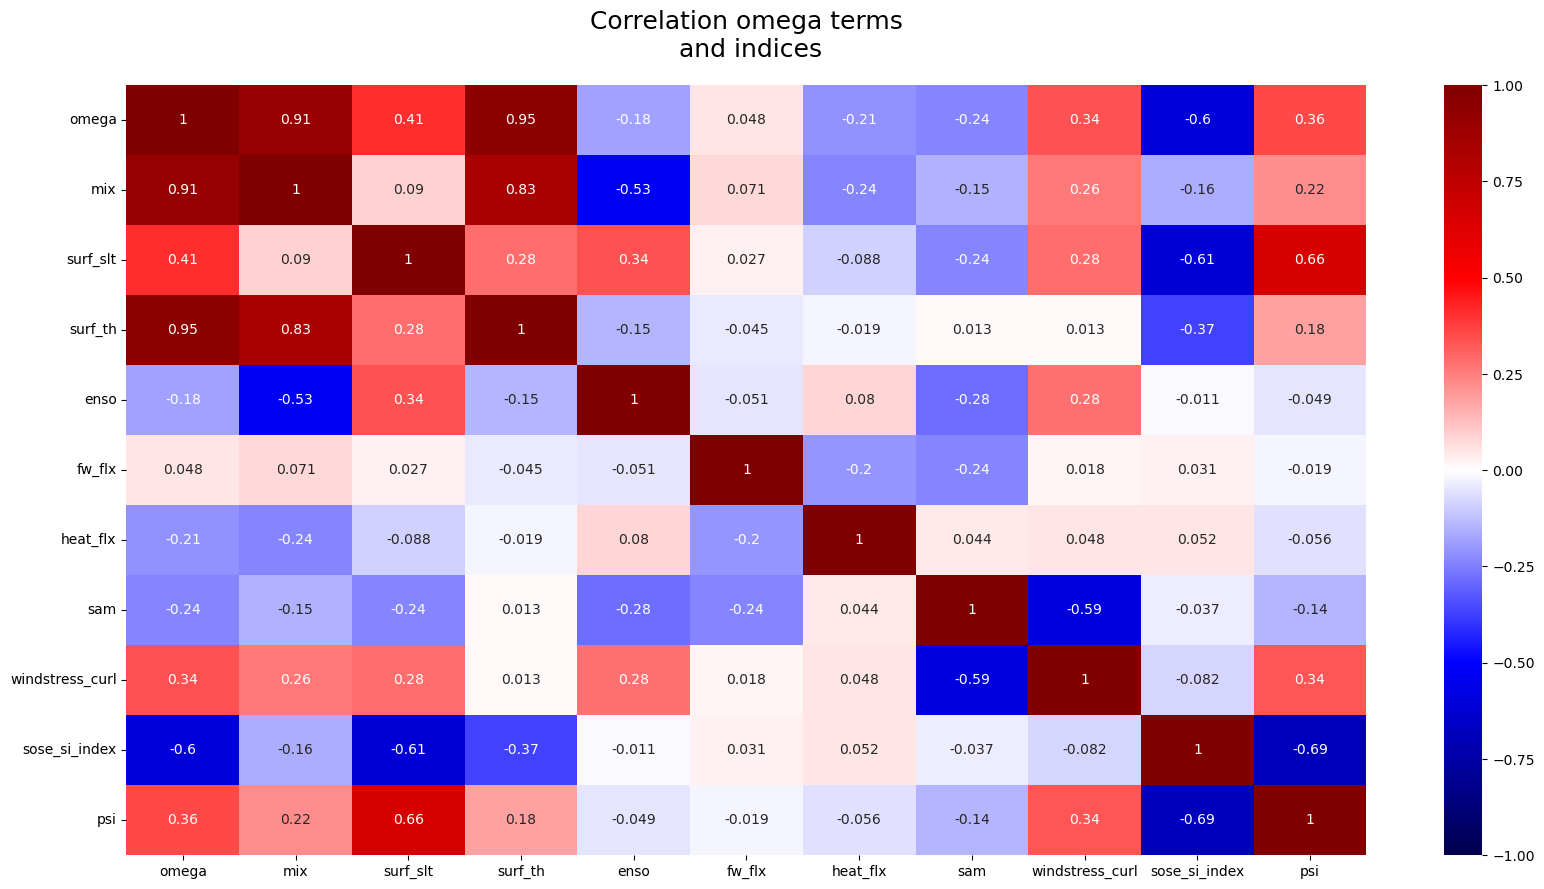

In [136]:
plt.figure(figsize=(20,10))
sn.heatmap(corr_omega, annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation omega terms\n and indices', fontsize=18, pad=20.5);

In [137]:
# save df for corr-bars fig in stacked-figs dir
budget_ind.to_csv('sose_budgt_ind')

In [138]:
# save df for corr-bars fig in stacked-figs dir
omega_ind.to_csv('sose_omega_ind')

## Calculating p values and confidence intervals for `omega_ind_corr`

In [139]:
from scipy.stats import pearsonr
omega_indices = pd.read_csv('sose_omega_ind')
omega_ind = omega_indices.set_index('time')

In [140]:
corr_omega = omega_ind.corr()

In [141]:
def confidence_matrix(corr_arr, orig_df):
    """Function to create a matrix populated with Pearson's p-value.
       Input are the corr_arr: pandas df after running `.corr()` to 
       get output matrix the same shape corr matrices; and orig_df: to drop NaNs since 
       `pearsonr()` cannot run with NaNs in df."""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j])[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [142]:
def confidence_interval_low(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[0]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [143]:
def confidence_interval_high(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [144]:
corr_omega

omega       mix  surf_slt   surf_th      enso    fw_flx  \
omega            1.000000  0.913382  0.412044  0.949394 -0.182104  0.047559   
mix              0.913382  1.000000  0.089621  0.829380 -0.528332  0.071242   
surf_slt         0.412044  0.089621  1.000000  0.283101  0.337718  0.027425   
surf_th          0.949394  0.829380  0.283101  1.000000 -0.146347 -0.044733   
enso            -0.182104 -0.528332  0.337718 -0.146347  1.000000 -0.050652   
fw_flx           0.047559  0.071242  0.027425 -0.044733 -0.050652  1.000000   
heat_flx        -0.213045 -0.238851 -0.088388 -0.019124  0.080254 -0.203783   
sam             -0.235794 -0.149181 -0.238014  0.012802 -0.283055 -0.238027   
windstress_curl  0.341897  0.259998  0.281799  0.012977  0.276552  0.017578   
sose_si_index   -0.595294 -0.161713 -0.609672 -0.369427 -0.011205  0.030909   
psi              0.355260  0.223996  0.661763  0.182910 -0.048829 -0.019124   

                 heat_flx       sam  windstress_curl  sose_si_index       psi  
omega           -0.213045 -0.235794         0.341897      -0.595294  0.355260  
mix             -0.238851 -0.149181         0.259998      -0.161713  0.223996  
surf_slt        -0.088388 -0.238014         0.281799      -0.609672  0.661763  
surf_th         -0.019124  0.012802         0.012977      -0.369427  0.182910  
enso             0.080254 -0.283055         0.276552      -0.011205 -0.048829  
fw_flx          -0.203783 -0.238027         0.017578       0.030909 -0.019124  
heat_flx         1.000000  0.044157         0.047809       0.051822 -0.056073  
sam              0.044157  1.000000        -0.589282      -0.036725 -0.144007  
windstress_curl  0.047809 -0.589282         1.000000      -0.082484  0.335810  
sose_si_index    0.051822 -0.036725        -0.082484       1.000000 -0.693117  
psi             -0.056073 -0.144007         0.335810      -0.693117  1.000000

In [145]:
confidence_matrix(corr_omega, omega_ind)

omega       mix      surf_slt   surf_th      enso  \
omega            0.000000e+00  0.000003  1.604453e-09  0.000001  0.183301   
mix              3.306880e-06  0.000000  5.286185e-01  0.870260  0.000034   
surf_slt         1.604453e-09  0.528619  0.000000e+00  0.000261  0.011681   
surf_th          1.135986e-06  0.870260  2.613005e-04  0.000000  0.286349   
enso             1.833010e-01  0.000034  1.168141e-02  0.286349  0.000000   
fw_flx           7.302440e-01  0.605251  8.424545e-01  0.745715  0.723866   
heat_flx         1.183621e-01  0.079054  5.210671e-01  0.889778  0.477039   
sam              8.308540e-02  0.277020  8.014230e-02  0.926092  0.116816   
windstress_curl  1.062384e-02  0.055235  3.713101e-02  0.925081  0.245437   
sose_si_index    1.637237e-06  0.238186  7.791331e-07  0.005508  0.702492   
psi              2.173615e-08  0.043226  3.621311e-08  0.036864  0.723325   

                   fw_flx  heat_flx       sam  windstress_curl  sose_si_index  \
omega            0.730244  0.118362  0.083085         0.010624   1.637237e-06   
mix              0.605251  0.079054  0.277020         0.055235   2.381862e-01   
surf_slt         0.842455  0.521067  0.080142         0.037131   7.791331e-07   
surf_th          0.745715  0.889778  0.926092         0.925081   5.507551e-03   
enso             0.723866  0.477039  0.116816         0.245437   7.024916e-01   
fw_flx           0.000000  0.140989  0.086207         0.993184   7.298966e-01   
heat_flx         0.140989  0.000000  0.766961         0.668432   7.210291e-01   
sam              0.086207  0.766961  0.000000         0.000015   9.509041e-01   
windstress_curl  0.993184  0.668432  0.000015         0.000000   3.648224e-01   
sose_si_index    0.729897  0.721029  0.950904         0.364822   0.000000e+00   
psi              0.889778  0.684292  0.294209         0.012194   4.505668e-09   

                          psi  
omega            2.173615e-08  
mix              4.322604e-02  
surf_slt         3.621311e-08  
surf_th          3.686383e-02  
enso             7.233251e-01  
fw_flx           8.897783e-01  
heat_flx         6.842917e-01  
sam              2.942094e-01  
windstress_curl  1.219373e-02  
sose_si_index    4.505668e-09  
psi              0.000000e+00

In [146]:
confidence_interval_low(corr_omega, omega_ind)

omega       mix  surf_slt   surf_th      enso    fw_flx  \
omega            1.000000  0.373243  0.543746  0.401302 -0.426783 -0.220521   
mix              0.373243  1.000000 -0.344170 -0.286124 -0.696065 -0.197794   
surf_slt         0.543746 -0.344170  1.000000  0.238079  0.079548 -0.239616   
surf_th          0.401302 -0.286124  0.238079  1.000000 -0.396260 -0.306394   
enso            -0.426783 -0.696065  0.079548 -0.396260  1.000000 -0.310019   
fw_flx          -0.220521 -0.197794 -0.239616 -0.306394 -0.310019  1.000000   
heat_flx        -0.452753 -0.474106 -0.345581 -0.282986 -0.171862 -0.442762   
sam             -0.471590 -0.398698 -0.473418 -0.253356 -0.453485 -0.469705   
windstress_curl  0.084240 -0.005691  0.017835 -0.253192 -0.110702 -0.264201   
sose_si_index   -0.743215 -0.409444 -0.753151 -0.578068 -0.313592 -0.220460   
psi              0.492568  0.008996  0.481781  0.018250 -0.310109 -0.282986   

                 heat_flx       sam  windstress_curl  sose_si_index       psi  
omega           -0.452753 -0.471590         0.084240      -0.743215  0.492568  
mix             -0.474106 -0.398698        -0.005691      -0.409444  0.008996  
surf_slt        -0.345581 -0.473418         0.017835      -0.753151  0.481781  
surf_th         -0.282986 -0.253356        -0.253192      -0.578068  0.018250  
enso            -0.171862 -0.453485        -0.110702      -0.313592 -0.310109  
fw_flx          -0.442762 -0.469705        -0.264201      -0.220460 -0.282986  
heat_flx         1.000000 -0.226875        -0.209522      -0.218906 -0.316659  
sam             -0.226875  1.000000        -0.709554      -0.273179 -0.394242  
windstress_curl -0.209522 -0.709554         1.000000      -0.377402  0.077410  
sose_si_index   -0.218906 -0.273179        -0.377402       1.000000 -0.809552  
psi             -0.316659 -0.394242         0.077410      -0.809552  1.000000

In [147]:
confidence_interval_high(corr_omega, omega_ind)

omega       mix  surf_slt   surf_th      enso    fw_flx  \
omega            1.000000  0.733278  0.818764  0.748175  0.087416  0.308958   
mix              0.733278  1.000000  0.182706  0.244219 -0.305913  0.330296   
surf_slt         0.818764  0.182706  1.000000  0.656326  0.553431  0.290608   
surf_th          0.748175  0.244219  0.656326  1.000000  0.123755  0.223213   
enso             0.087416 -0.305913  0.553431  0.123755  1.000000  0.219404   
fw_flx           0.308958  0.330296  0.290608  0.223213  0.219404  1.000000   
heat_flx         0.055382  0.028235  0.181158  0.247428  0.354002  0.067831   
sam              0.031472  0.120902  0.029122  0.277158  0.054464  0.033891   
windstress_curl  0.556699  0.491400  0.509040  0.277320  0.407358  0.266393   
sose_si_index   -0.391888  0.108227 -0.410823 -0.115444  0.215633  0.309016   
psi              0.794324  0.502461  0.789045  0.509348  0.219309  0.247428   

                 heat_flx       sam  windstress_curl  sose_si_index       psi  
omega            0.055382  0.031472         0.556699      -0.391888  0.794324  
mix              0.028235  0.120902         0.491400       0.108227  0.502461  
surf_slt         0.181158  0.029122         0.509040      -0.410823  0.789045  
surf_th          0.247428  0.277158         0.277320      -0.115444  0.509348  
enso             0.354002  0.054464         0.407358       0.215633  0.219309  
fw_flx           0.067831  0.033891         0.266393       0.309016  0.247428  
heat_flx         1.000000  0.302894         0.319352       0.310491  0.212384  
sam              0.302894  1.000000        -0.329876       0.257380  0.126108  
windstress_curl  0.319352 -0.329876         1.000000       0.145529  0.551936  
sose_si_index    0.310491  0.257380         0.145529       1.000000 -0.524213  
psi              0.212384  0.126108         0.551936      -0.524213  1.000000